# **Libraries**

First we are going to load the different libraries or modules we are going to use in this project. For example we use matplotlib and seaborn for graphics and plots and geopandas for maps.

In [1]:
%cd /content/drive/MyDrive/DS/Infectious_diseases_Colombia_project
!pip install geopandas

/content/drive/.shortcut-targets-by-id/120/DS/Infectious_diseases_Colombia_project


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Next, we load the shapefile of Colombia which has the polygons at the municipal level, and we are going to use it for the future heat maps of diseases and socioeconomic factors of interest.

In [5]:
nb = 'data/maps.shp'
regions = gpd.read_file(nb, replace=True)

# **Zika**

This dataset was extracted from SIVIGILA and INS (Insitituto Nacional de Salud).The present data set contains information from 2015 to 2018, and the next will be an EDA to see what are variables could be of useful to the next steps of the project.

Link data: http://portalsivigila.ins.gov.co/Paginas/Buscador.aspx#

Since we are using Google Collaboratory to develop this project, then we load the module ***google.colab*** and use the function ***drive***. And we have uploaded the files to a shared folder, divided by diseases, socioeconomic factors and climate.

In [6]:
zika2018 = pd.read_csv(r"data/zika_2018.csv", delimiter=",", encoding = "ISO-8859-1")
zika2017 = pd.read_csv(r"data/zika_2017.csv", delimiter=",", encoding = "ISO-8859-1")
zika2016 = pd.read_csv(r"data/zika_2016.csv", delimiter=",", encoding = "ISO-8859-1")
zika2015 = pd.read_csv(r"data/zika_2015.csv", delimiter=",", encoding = "ISO-8859-1")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (44,47,48,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Analysis of data**

The first task to do is see what kind of variables we have on each of one of datasets previously loaded. 

In [7]:
variables_2015 = list(zika2015.columns)
variables_2016 = list(zika2016.columns)
variables_2017 = list(zika2017.columns)
variables_2018 = list(zika2018.columns)

In [8]:
zika2015.columns

Index(['CONSECUTIVE', 'COD_EVE', 'FEC_NOT', 'SEMANA', 'ANO', 'COD_PRE',
       'COD_SUB', 'EDAD', 'UNI_MED', 'SEXO', 'COD_PAIS_O', 'COD_DPTO_O',
       'COD_MUN_O', 'AREA', 'LOCALIDAD', 'CEN_POBLA', 'VEREDA', 'OCUPACION',
       'TIP_SS', 'COD_ASE', 'PER_ETN', 'GRU_POB', 'GP_DISCAPA', 'GP_DESPLAZ',
       'GP_MIGRANT', 'GP_CARCELA', 'GP_GESTAN', 'GP_INDIGEN', 'GP_POBICFB',
       'GP_MAD_COM', 'GP_DESMOVI', 'GP_PSIQUIA', 'GP_VIC_VIO', 'GP_OTROS',
       'COD_DPTO_R', 'COD_MUN_R', 'COD_DPTO_N', 'COD_MUN_N', 'FEC_CON',
       'INI_SIN', 'TIP_CAS', 'PAC_HOS', 'FEC_HOS', 'CON_FIN', 'FEC_DEF',
       'AJUSTE', 'FECHA_NTO', 'CER_DEF', 'CBMTE', 'FEC_ARC_XL', 'FEC_AJU',
       'FM_FUERZA', 'FM_UNIDAD', 'FM_GRADO', 'confirmados', 'va_sispro',
       'Evento', 'Departamento_ocurrencia', 'Municipio_ocurrencia',
       'Departamento_residencia', 'Municipio_residencia',
       'Departamento_notificacion', 'Municipio_Notificacion', 'Nombre_UPGD',
       'est_f_caso', 'nom_est_f_caso'],
      dtype='

In this case the first thing to do is to check the names of the variables across time and if there are new variables.

In [9]:
dict_diff_columns = {}
for index, var in enumerate(variables_2015):
  if var not in variables_2016:
    dict_diff_columns["2016" + str(index)] = var
for index, var in enumerate(variables_2016):
  if var not in variables_2017:
    dict_diff_columns["2017" + str(index)] = var
for index, var in enumerate(variables_2017):
  if var not in variables_2018:
    dict_diff_columns["2018" + str(index)] = var

dict_diff_columns   

{'201855': 'va_sispro',
 '201857': 'Departamento_ocurrencia',
 '201861': 'Departamento_notificacion',
 '201862': 'Municipio_Notificacion',
 '201863': 'Nombre_UPGD',
 '201865': 'nom_est_f_caso'}

In this case, all columns have the same name with some exceptions in 2018, for example: *nom_est_f_caso* was changed by *estado_final_de_caso*, and *Departamento_notificacion* is not present in this year.

**Data dictionary**

*   **CONSECUTIVE**: Unique ID for each case.
*   **COD_EVE**: Event code.
*   **FEC_NOT**: Notification Date to Instituto Nacional de Salud.
*   **SEMANA**: Week of the notification date.
*   **ANO**: Year of the notification date.
*   **COD_PRE**: Code assigned in the SGSSS to health service providers.
*   **COD_SUB**: Code assigned in the SGSSS to health service providers that indicates headquarters or territory.
*   **EDAD**: Age of the persons with the disease.
*   **UNI_MED**: Age unit of measure.
*   **SEXO**: Sex of the persons with the disease.

In this case, we only are interested in the variables that could explain the disease like demographics variables, then we drop some variables from each table.

In [10]:
zika2018n=zika2018.drop(['VEREDA','BAR_VER','LOCALIDAD','CEN_POBLA','GRU_POB','COD_ASE',
                'COD_DPTO_N','COD_MUN_N','VERSION','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL','FEC_AJU',
                'FM_UNIDAD','FM_GRADO','Evento','Departamento_residencia','Municipio_residencia'],axis=1)

zika2017n=zika2017.drop(['VEREDA','LOCALIDAD','CEN_POBLA','GRU_POB','COD_ASE',
                'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL','FEC_AJU',
                'FM_UNIDAD','FM_GRADO','Evento','Departamento_residencia','Municipio_residencia',
                'Departamento_notificacion','Nombre_UPGD','Municipio_Notificacion','va_sispro'],axis=1)
zika2016n=zika2016.drop(['VEREDA','LOCALIDAD','CEN_POBLA','GRU_POB','COD_ASE',
                'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL','FEC_AJU',
                'FM_UNIDAD','FM_GRADO','Evento','Departamento_residencia','Municipio_residencia','va_sispro','Departamento_notificacion',
                'Municipio_Notificacion','Nombre_UPGD'],axis=1)
zika2015n=zika2015.drop(['VEREDA','LOCALIDAD','CEN_POBLA','GRU_POB','COD_ASE',
                'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL','FEC_AJU',
                'FM_UNIDAD','FM_GRADO','Evento','Departamento_residencia','Municipio_residencia',
                'va_sispro','Departamento_notificacion',
                'Municipio_Notificacion','Nombre_UPGD'],axis=1)

We are going to change the name of the variables that changed over time, this in order to unify/append the information correctly and work with only one dataframe.

In [11]:
zika2018n=zika2018n.rename(columns={'Departanento_ocurrencia':'Departamento_ocurrencia','estado_final_de_caso':'nom_est_f_caso'})
zika=pd.concat([zika2018n,zika2017n,zika2016n,zika2015n])
zika.head(5)

CONSECUTIVE  COD_EVE  ... Departamento_ocurrencia  Municipio_ocurrencia
0      5809523      895  ...               ANTIOQUIA                TARAZA
1      5809367      895  ...                 CORDOBA                 CHINU
2      5849416      895  ...                 CORDOBA                 CHINU
3      5838927      895  ...                   SUCRE                  TOLU
4      5809464      895  ...               ATLANTICO               LURUACO

[5 rows x 45 columns]

In [12]:
print("Total number of rows:",zika.shape[0])
print("Total number of columns:",zika.shape[1])

Total number of rows: 75778
Total number of columns: 45


Next, we are going to explore the data and as we can see below: the data contains a lot of null values for some variables. That variables could be excluded from the analysis because for now, because, they do not contribute anything new to future models.

In [13]:
zika.isnull().sum()

CONSECUTIVE                    0
COD_EVE                        0
FEC_NOT                        0
SEMANA                         0
ANO                            0
COD_PRE                        0
COD_SUB                        0
EDAD                           0
UNI_MED                        0
SEXO                           0
COD_PAIS_O                     0
COD_DPTO_O                     0
COD_MUN_O                      0
AREA                           0
OCUPACION                      0
TIP_SS                         0
PER_ETN                        0
GP_DISCAPA                     0
GP_DESPLAZ                     0
GP_MIGRANT                     0
GP_CARCELA                     0
GP_GESTAN                      0
GP_INDIGEN                     0
GP_POBICFB                     0
GP_MAD_COM                     0
GP_DESMOVI                     0
GP_PSIQUIA                     0
GP_VIC_VIO                     0
GP_OTROS                       0
COD_DPTO_R                     0
COD_MUN_R 

**Analyzing some geographical zones:** 
This process is crucial because we will use data that are present in a few departments in Colombia for social-economical data, so, we make a list of these zones and check if they are present in the list of target cities.

In [14]:
zika.Departamento_ocurrencia.unique()	

array(['ANTIOQUIA', 'CORDOBA', 'SUCRE', 'ATLANTICO', 'CAUCA', 'VICHADA',
       'HUILA', 'MAGDALENA', 'CASANARE', 'EXTERIOR', 'BOLIVAR',
       'CUNDINAMARCA', 'GUAINIA', 'VALLE', 'PUTUMAYO', 'ARAUCA', 'META',
       'SANTANDER', 'TOLIMA', 'BOYACA', 'NORTE SANTANDER', 'RISARALDA',
       'CAQUETA', 'SAN ANDRES', 'BOGOTA', 'GUAVIARE', 'GUAJIRA',
       'QUINDIO', 'NARIÑO', 'CHOCO', 'AMAZONAS', 'CALDAS', 'CESAR',
       'VAUPES', 'NARI¥O'], dtype=object)

In [15]:
target_cities = [
     'MEDELLIN', 'BARRANQUILLA', 'BOGOTA', 'CARTAGENA', 'TUNJA',
       'MANIZALES', 'FLORENCIA', 'POPAYAN', 'VALLEDUPAR', 'MONTERIA',
       'QUIBDO', 'NEIVA', 'RIOHACHA', 'SANTA MARTA', 'VILLAVICENCIO',
       'PASTO', 'CUCUTA', 'ARMENIA', 'PEREIRA', 'BUCARAMANGA',
       'SINCELEJO', 'IBAGUE', 'CALI'           
]

cities_data_set = list(zika.Municipio_ocurrencia.unique()	) 

In [16]:
cities = []
for city in cities_data_set:
  if city in target_cities:
    cities.append(city)
for city in target_cities:
  if city not in cities:
    print(city, "is not present in the Zika Dataset!")


SANTA MARTA is not present in the Zika Dataset!


Since Santa Marta is not present in the Zika Dataset, we will filter the data of the cities target that does not match.

In [17]:
zika = zika[zika['Municipio_ocurrencia'].isin(cities)]

Let's plot some graphs to make a deep understanding of our data.

In [18]:
zika['nom_est_f_caso'] = zika['nom_est_f_caso'].replace({'Confirmado por Cl¡nica':'Confirmado por Clínica', 
                                                         'Confirmado por Nexo Epidemiol¢gico':'Confirmado por Nexo Epidemiológico'})

**Different types of cases of Zika.**

As we can see, there are four types of cases of Zika: Suspicious, confirmed by clinic, confirmed by lab and confirmed by epidemiological link. In this case the most common cases are Confirmed by clinic, followed by confirmed by lab.

Text(0.5, 0, 'Type of cases')

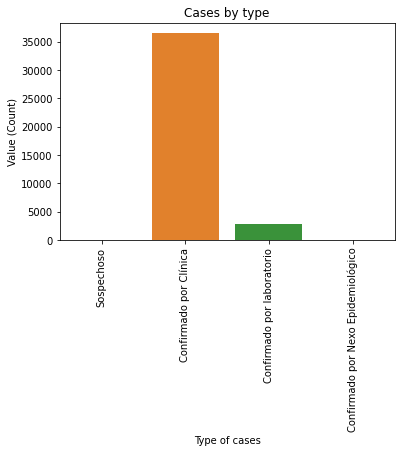

In [19]:
ax=sns.countplot(x='nom_est_f_caso',data=zika)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Cases by type')
ax.set_ylabel('Value (Count)')
ax.set_xlabel('Type of cases')

**What was the year with most cases of Zika?**

The year 2016 is the year with most cases, followed by 2015.

Text(0.5, 0, 'Year')

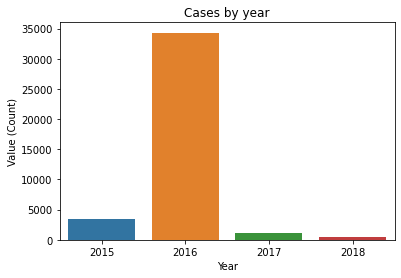

In [20]:
ax=sns.countplot(x='ANO',data=zika)
ax.set_title('Cases by year')
ax.set_ylabel('Value (Count)')
ax.set_xlabel('Year')

**Cases per city**

We can see that the principal cities that have a lot of cases are Cali, Cucuta and Bucaramanga.

Text(0.5, 0, 'City')

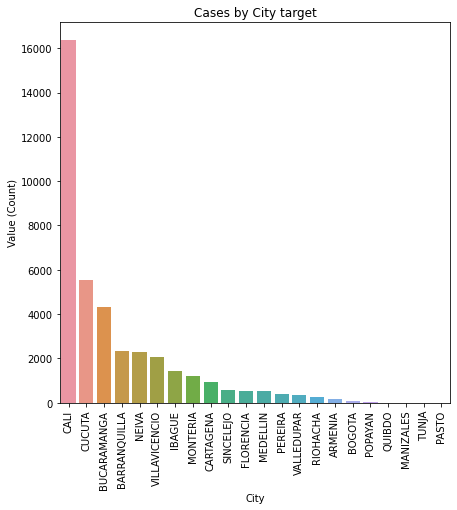

In [21]:
cases_per_citiy = zika.groupby(['Municipio_ocurrencia'])['Municipio_ocurrencia'].count().reset_index(name= 'count').sort_values(
    by =('count'), ascending = False)
cases_per_citiy = zika.groupby(['Municipio_ocurrencia'])['Municipio_ocurrencia'].count().reset_index(name= 'count').sort_values(
    by =('count'), ascending = False)

fig, ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(data=cases_per_citiy, x='Municipio_ocurrencia', y = 'count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Cases by City target')
ax.set_ylabel('Value (Count)')
ax.set_xlabel('City')

**Cases per age**

The chart belows tells us that is more propensity to get Zika  to whose people are between 21 and 40 years old.

Text(0.5, 0, 'Age Group')

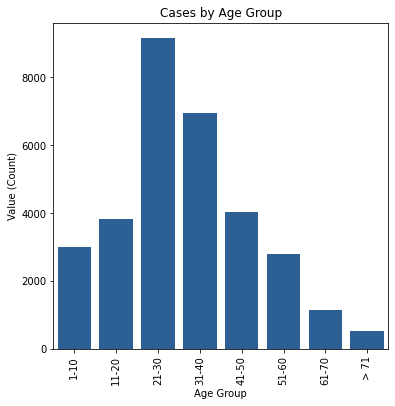

In [22]:
cases_per_age = zika.groupby(['EDAD'])['EDAD'].count().reset_index(name= 'count').sort_values(
    by =('count'), ascending = False
)
cases_per_age.loc[(cases_per_age.EDAD > 1) & (cases_per_age.EDAD < 10),  'AgeGroup'] = '1-10'
cases_per_age.loc[(cases_per_age.EDAD > 11) & (cases_per_age.EDAD < 20),  'AgeGroup'] = '11-20'
cases_per_age.loc[(cases_per_age.EDAD > 21) & (cases_per_age.EDAD < 30),  'AgeGroup'] = '21-30'
cases_per_age.loc[(cases_per_age.EDAD > 31) & (cases_per_age.EDAD < 40),  'AgeGroup'] = '31-40'
cases_per_age.loc[(cases_per_age.EDAD > 41) & (cases_per_age.EDAD < 50),  'AgeGroup'] = '41-50'
cases_per_age.loc[(cases_per_age.EDAD > 51) & (cases_per_age.EDAD < 50),  'AgeGroup'] = '41-50'
cases_per_age.loc[(cases_per_age.EDAD > 51) & (cases_per_age.EDAD < 60),  'AgeGroup'] = '51-60'
cases_per_age.loc[(cases_per_age.EDAD > 61) & (cases_per_age.EDAD < 70),  'AgeGroup'] = '61-70'
cases_per_age.loc[(cases_per_age.EDAD > 71),  'AgeGroup'] = '> 71'

cases_per_age = cases_per_age.groupby(['AgeGroup'])['count'].sum().reset_index(name= 'sum').sort_values(
    by =('AgeGroup'), ascending = True
)
# cases_per_age
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(data=cases_per_age, x='AgeGroup', y = 'sum', color='#1B5FA4')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Cases by Age Group')
ax.set_ylabel('Value (Count)')
ax.set_xlabel('Age Group')

Also the next graph tells us that is more propensity to get Zika to whose people are between 21-30 years old that are females.

Text(0.5, 0, 'Age Group')

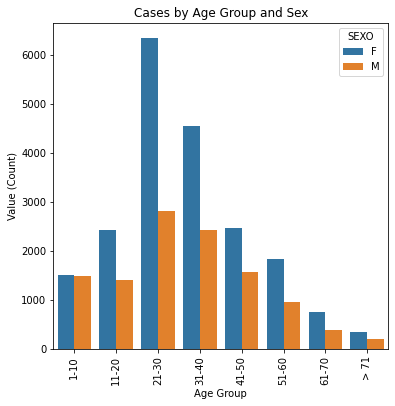

In [23]:
cases_per_age = zika.groupby(['EDAD','SEXO'])['EDAD'].count().reset_index(name= 'count').sort_values(
    by =('count'), ascending = False
)
cases_per_age.loc[(cases_per_age.EDAD > 1) & (cases_per_age.EDAD < 10),  'AgeGroup'] = '1-10'
cases_per_age.loc[(cases_per_age.EDAD > 11) & (cases_per_age.EDAD < 20),  'AgeGroup'] = '11-20'
cases_per_age.loc[(cases_per_age.EDAD > 21) & (cases_per_age.EDAD < 30),  'AgeGroup'] = '21-30'
cases_per_age.loc[(cases_per_age.EDAD > 31) & (cases_per_age.EDAD < 40),  'AgeGroup'] = '31-40'
cases_per_age.loc[(cases_per_age.EDAD > 41) & (cases_per_age.EDAD < 50),  'AgeGroup'] = '41-50'
cases_per_age.loc[(cases_per_age.EDAD > 51) & (cases_per_age.EDAD < 50),  'AgeGroup'] = '41-50'
cases_per_age.loc[(cases_per_age.EDAD > 51) & (cases_per_age.EDAD < 60),  'AgeGroup'] = '51-60'
cases_per_age.loc[(cases_per_age.EDAD > 61) & (cases_per_age.EDAD < 70),  'AgeGroup'] = '61-70'
cases_per_age.loc[(cases_per_age.EDAD > 71),  'AgeGroup'] = '> 71'

cases_per_age = cases_per_age.groupby(['AgeGroup','SEXO'])['count'].sum().reset_index(name= 'sum').sort_values(
    by =('AgeGroup'), ascending = True
)
# cases_per_age
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(data=cases_per_age, x='AgeGroup', y = 'sum', hue = 'SEXO')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Cases by Age Group and Sex')
ax.set_ylabel('Value (Count)')
ax.set_xlabel('Age Group')

In the data set, we find some interesting variables that refer to poblational groups, there are 2 categories to these ethnic groups:
1. Persons belong to the poblational group
2. Persons does not belong to the poblational group

Text(0.5, 0.98, 'Cases by Poblational Groups')

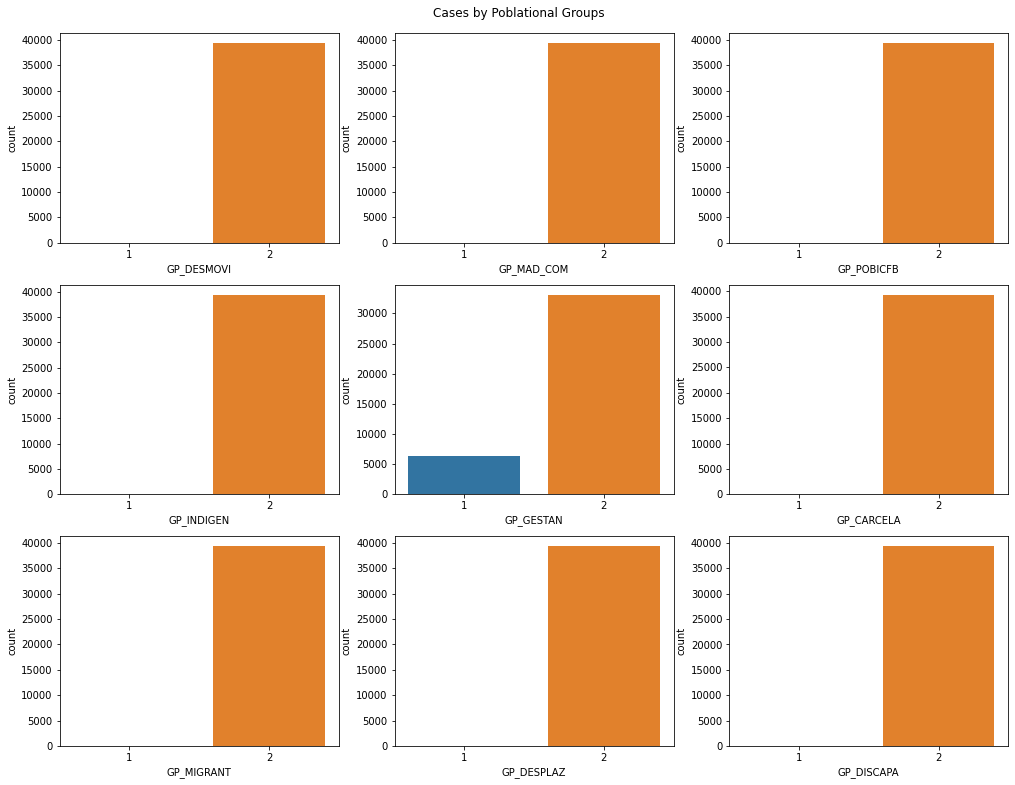

In [24]:
fig, ax = plt.subplots(3, 3, figsize=(17,12))
sns.countplot(x='GP_DESMOVI', data=zika, ax =ax[0,0])
sns.countplot(x='GP_MAD_COM',data=zika, ax =ax[0,1])
sns.countplot(x='GP_POBICFB',data=zika, ax = ax[0,2])
sns.countplot(x='GP_INDIGEN',data=zika, ax = ax[1,0])
sns.countplot(x='GP_GESTAN',data=zika, ax = ax[1,1])
sns.countplot(x='GP_CARCELA',data=zika, ax = ax[1,2])
sns.countplot(x='GP_MIGRANT',data=zika, ax = ax[2,0])
sns.countplot(x='GP_DESPLAZ',data=zika, ax = ax[2,1])
sns.countplot(x='GP_DISCAPA',data=zika,ax = ax[2,2])
plt.subplots_adjust(top=0.95)
plt.suptitle('Cases by Poblational Groups')

As we suspect, we can see cases on females in this case, pregnant woman trend to suffer more cases of Zika, a few cases also can see in the prison sector.

**Time Series**

In [25]:
from datetime import datetime as dt
zika['Date'] = pd.to_datetime(zika['ANO'].astype(str) + '-' + zika['SEMANA'].astype(str) + '-1', format='%Y-%W-%w')

In [26]:
# zika['Date']
zika_2 = zika.set_index('Date')
g = zika_2.groupby(pd.Grouper(freq="M"))
g = g['CONSECUTIVE'].count().reset_index(name='Count')
g

Date  Count
0  2015-08-31     48
1  2015-09-30     47
2  2015-10-31    269
3  2015-11-30   1082
4  2015-12-31   2031
5  2016-01-31   6701
6  2016-02-29   6920
7  2016-03-31   4301
8  2016-04-30   4981
9  2016-05-31   5510
10 2016-06-30   2932
11 2016-07-31   1377
12 2016-08-31    791
13 2016-09-30    301
14 2016-10-31    261
15 2016-11-30    114
16 2016-12-31    120
17 2017-01-31    211
18 2017-02-28    216
19 2017-03-31    133
20 2017-04-30    120
21 2017-05-31    120
22 2017-06-30     62
23 2017-07-31     93
24 2017-08-31     62
25 2017-09-30     49
26 2017-10-31     51
27 2017-11-30     36
28 2017-12-31     33
29 2018-01-31     98
30 2018-02-28     49
31 2018-03-31     17
32 2018-04-30     47
33 2018-05-31     37
34 2018-06-30     42
35 2018-07-31     50
36 2018-08-31     16
37 2018-09-30     25
38 2018-10-31     12
39 2018-11-30     11
40 2018-12-31     19

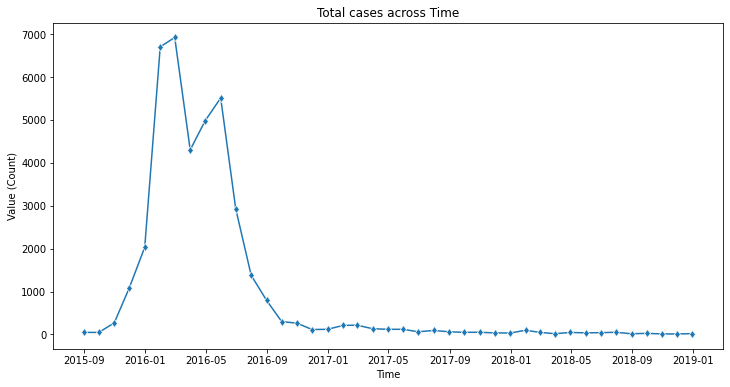

In [27]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax = sns.lineplot(x='Date',y='Count', data=g, marker='d')
ax.set_title('Total cases across Time')
ax.set_ylabel('Value (Count)')
ax.set_xlabel('Time')
plt.show()

We can see in this graph that the number of cases between 2016 is really higher and eventually the cases decrease rapidly, it must due to programs of prevention of Zika like World Mosquito Program.

In [28]:
zika.loc[(zika.FM_FUERZA == 3.0),'FM_FUERZA']='3'
zika.loc[(zika.FM_FUERZA == 4.0),'FM_FUERZA']='4'
zika.loc[(zika.FM_FUERZA == 5.0),'FM_FUERZA']='5'
zika.loc[(zika.FM_FUERZA == 8.0),'FM_FUERZA']='8'
zika.loc[(zika.FM_FUERZA == 7.0),'FM_FUERZA']='7'

# **Dengue**

This dataset was extracted from SIVIGILA and INS (Insitituto Nacional de Salud).The present data set contains information from 2007 to 2018, and the next will be an EDA to see what are variables could be of useful to the next steps of the project.

Link data: http://portalsivigila.ins.gov.co/Paginas/Buscador.aspx#

In [29]:
dengue2007 = pd.read_csv('data/dengue_2007.csv',encoding = "ISO-8859-1")
dengue2008 = pd.read_csv('data/dengue_2008.csv',encoding = "ISO-8859-1")
dengue2009 = pd.read_csv('data/dengue_2009.csv',encoding = "ISO-8859-1")
dengue2010 = pd.read_csv('data/dengue_2010.csv',encoding = "ISO-8859-1")
dengue2011 = pd.read_csv('data/dengue_2011.csv',encoding = "ISO-8859-1")
dengue2012 = pd.read_csv('data/dengue_2012.csv',encoding = "ISO-8859-1")
dengue2013 = pd.read_csv('data/dengue_2013.csv',encoding = "ISO-8859-1")
dengue2014 = pd.read_csv('data/dengue_2014.csv',encoding = "ISO-8859-1")
dengue2015 = pd.read_csv('data/dengue_2015.csv',encoding = "ISO-8859-1")
dengue2016 = pd.read_csv('data/dengue_2016.csv',encoding = "ISO-8859-1")
dengue2017 = pd.read_csv('data/dengue_2017.csv',encoding = "ISO-8859-1")
dengue2018 = pd.read_csv('data/dengue_2018.csv',sep=';',encoding = "ISO-8859-1")

**Analysis of data**

The first task to do is see what kind of variables we have on each of one of datasets previously loaded.

In [30]:
variables_2007 = list(dengue2007.columns)
variables_2008 = list(dengue2008.columns)
variables_2009 = list(dengue2009.columns)
variables_2010 = list(dengue2010.columns)
variables_2011 = list(dengue2011.columns)
variables_2012 = list(dengue2012.columns)
variables_2013 = list(dengue2013.columns)
variables_2014 = list(dengue2014.columns)
variables_2015 = list(dengue2015.columns)
variables_2016 = list(dengue2016.columns)
variables_2017 = list(dengue2017.columns)
variables_2018 = list(dengue2018.columns)

Now, we will check if all columns have the same name across the time.

In [31]:
dict_diff_columns = {}
for index, var in enumerate(variables_2007):
  if var not in variables_2008:
    dict_diff_columns["2008" + str(index)] = var
for index, var in enumerate(variables_2008):
  if var not in variables_2009:
    dict_diff_columns["2009" + str(index)] = var
for index, var in enumerate(variables_2009):
  if var not in variables_2010:
    dict_diff_columns["2010" + str(index)] = var
for index, var in enumerate(variables_2010):
  if var not in variables_2011:
    dict_diff_columns["2011" + str(index)] = var
for index, var in enumerate(variables_2011):
  if var not in variables_2012:
    dict_diff_columns["2012" + str(index)] = var
for index, var in enumerate(variables_2012):
  if var not in variables_2013:
    dict_diff_columns["2013" + str(index)] = var
for index, var in enumerate(variables_2013):
  if var not in variables_2014:
    dict_diff_columns["2014" + str(index)] = var
for index, var in enumerate(variables_2014):
  if var not in variables_2015:
    dict_diff_columns["2015" + str(index)] = var
for index, var in enumerate(variables_2015):
  if var not in variables_2016:
    dict_diff_columns["2016" + str(index)] = var    
for index, var in enumerate(variables_2016):
  if var not in variables_2017:
    dict_diff_columns["2017" + str(index)] = var  
for index, var in enumerate(variables_2017):
  if var not in variables_2018:
    dict_diff_columns["2018" + str(index)] = var
dict_diff_columns  

{'201854': 'va_sispro',
 '201856': 'Departamento_ocurrencia',
 '201860': 'Departamento_notificacion',
 '201861': 'Municipio_Notificacion',
 '201862': 'Nombre_UPGD'}

All datasets has the same columns but in 2018 there was a mistake or misspell in one column. In the cell below it was changed correctly to append all the datasets.

In [32]:
dengue2018=dengue2018.rename(columns={'Departanento_ocurrencia':'Departamento_ocurrencia'})

In [33]:
dengue = pd.concat([dengue2007,dengue2008,dengue2009,dengue2010,dengue2011,dengue2012,dengue2013,
                  dengue2014,dengue2015,dengue2016,dengue2017,dengue2018])
pd.options.display.max_columns = None
dengue.head()

CONSECUTIVE  COD_EVE     FEC_NOT  SEMANA   ANO    COD_PRE  COD_SUB  EDAD  \
0      1621843      220  2007-11-16      46  2007  800100789        1     8   
1      1609055      220  2007-10-05      40  2007  800100789        1     6   
2      1608925      220  2007-09-16      37  2007  800100789        1     8   
3      1609053      220  2007-10-05      40  2007  800100789        1    19   
4      1609054      220  2007-10-05      40  2007  800100789        1     5   

   UNI_MED SEXO  COD_PAIS_O  COD_DPTO_O  COD_MUN_O  AREA LOCALIDAD CEN_POBLA  \
0        1    F         170           8        433     1  SIN DATO  SIN DATO   
1        1    F         170           8        758     1  SIN DATO  SIN DATO   
2        1    F         170           8          1     1  SIN DATO  SIN DATO   
3        1    M         170           8          1     1  SIN DATO  SIN DATO   
4        1    F         170           8          1     1  SIN DATO  SIN DATO   

   OCUPACION TIP_SS COD_ASE  PER_ETN  GRU_POB  GP_DISCAPA  GP_DESPLAZ  \
0       9998      C  EPS002        6      5.0           2           2   
1       9997      C  EPS002        6      5.0           2           2   
2       9997      C  EPS002        6      5.0           2           2   
3       9997      C  EPS002        6      5.0           2           2   
4       9997      C  EPS002        6      5.0           2           2   

   GP_MIGRANT  GP_CARCELA  GP_GESTAN  GP_INDIGEN  GP_POBICFB  GP_MAD_COM  \
0           2           2          2           2           2           2   
1           2           2          2           2           2           2   
2           2           2          2           2           2           2   
3           2           2          2           2           2           2   
4           2           2          2           2           2           2   

   GP_DESMOVI  GP_PSIQUIA  GP_VIC_VIO  GP_OTROS  COD_DPTO_R  COD_MUN_R  \
0           2           2           2         1           8        433   
1           2           2           2         1           8        758   
2           2           2           2         1           8          1   
3           2           2           2         1           8          1   
4           2           2           2         1           8          1   

   COD_DPTO_N  COD_MUN_N     FEC_CON     INI_SIN  TIP_CAS  PAC_HOS  \
0           8       8001  2007-11-16  2007-11-14        2        1   
1           8       8001  2007-10-05  2007-10-01        3        1   
2           8       8001  2007-09-16  2007-09-05        2        1   
3           8       8001  2007-10-05  2007-10-01        2        1   
4           8       8001  2007-10-05  2007-10-01        2        1   

      FEC_HOS  CON_FIN FEC_DEF  AJUSTE   FECHA_NTO CER_DEF CBMTE  FEC_ARC_XL  \
0  2007-11-16        1     NaN       0  1999-11-16     NaN        2007-11-16   
1  2007-10-05        1     NaN       0  2001-10-05     NaN        2007-10-05   
2  2007-09-16        1     NaN       0  1999-09-16     NaN        2007-09-16   
3  2007-10-05        1     NaN       0  1988-10-05     NaN        2007-10-05   
4  2007-10-05        1     NaN       0  2002-10-05     NaN        2007-10-05   

      FEC_AJU FM_FUERZA  FM_UNIDAD FM_GRADO  confirmados  va_sispro  \
0  2007-11-16       NaN        NaN      NaN            0        1.0   
1  2007-10-05       NaN        NaN      NaN            1        1.0   
2  2007-09-16       NaN        NaN      NaN            0        1.0   
3  2007-10-05       NaN        NaN      NaN            0        1.0   
4  2007-10-05       NaN        NaN      NaN            0        1.0   

         Evento Departamento_ocurrencia Municipio_ocurrencia  \
0  DENGUE GRAVE               ATLANTICO              MALAMBO   
1  DENGUE GRAVE               ATLANTICO              SOLEDAD   
2  DENGUE GRAVE               ATLANTICO         BARRANQUILLA   
3  DENGUE GRAVE               ATLANTICO         BARRANQUILLA   
4  DENGUE GRAVE               ATLANTICO         BARRANQUI

In this step, we select the columns work with, and make the corresponding EDA.

In [34]:
dengue_res = dengue[['FEC_CON','ANO','EDAD','SEXO','FEC_DEF','confirmados','Departamento_ocurrencia','Municipio_ocurrencia']]
dengue_res

FEC_CON   ANO  EDAD SEXO FEC_DEF  confirmados Departamento_ocurrencia  \
0    2007-11-16  2007     8    F     NaN            0               ATLANTICO   
1    2007-10-05  2007     6    F     NaN            1               ATLANTICO   
2    2007-09-16  2007     8    F     NaN            0               ATLANTICO   
3    2007-10-05  2007    19    M     NaN            0               ATLANTICO   
4    2007-10-05  2007     5    F     NaN            0               ATLANTICO   
..          ...   ...   ...  ...     ...          ...                     ...   
514  2018-11-29  2018     8    F     NaN            1                 BOLIVAR   
515  2018-09-23  2018    19    M     NaN            1                 BOLIVAR   
516  2018-11-18  2018     9    F     NaN            1                 BOLIVAR   
517  2018-12-27  2018    11    F     NaN            1                 BOLIVAR   
518  2018-11-26  2018     6    F     NaN            1                 BOLIVAR   

    Municipio_ocurrencia  
0                MALAMBO  
1                SOLEDAD  
2           BARRANQUILLA  
3           BARRANQUILLA  
4           BARRANQUILLA  
..                   ...  
514            CARTAGENA  
515            CARTAGENA  
516            CARTAGENA  
517            CARTAGENA  
518            CARTAGENA  

[39596 rows x 8 columns]

We check if there are any null values on the dataset. For example, we can see on FEC_DEF (Date of death) and FEC_CON there are null values.

In [35]:
dengue_res.isnull().any()

FEC_CON                     True
ANO                        False
EDAD                       False
SEXO                       False
FEC_DEF                     True
confirmados                False
Departamento_ocurrencia    False
Municipio_ocurrencia       False
dtype: bool

There are 3 types of people. 
1. People who was reported by symptoms. 
2. People who was confirmed, people who got sick with Dengue. 
3. People who died by Dengue

This first graph was made by the number of people reported by symptoms and grouped by ocurrence department between 2007 and 2018.


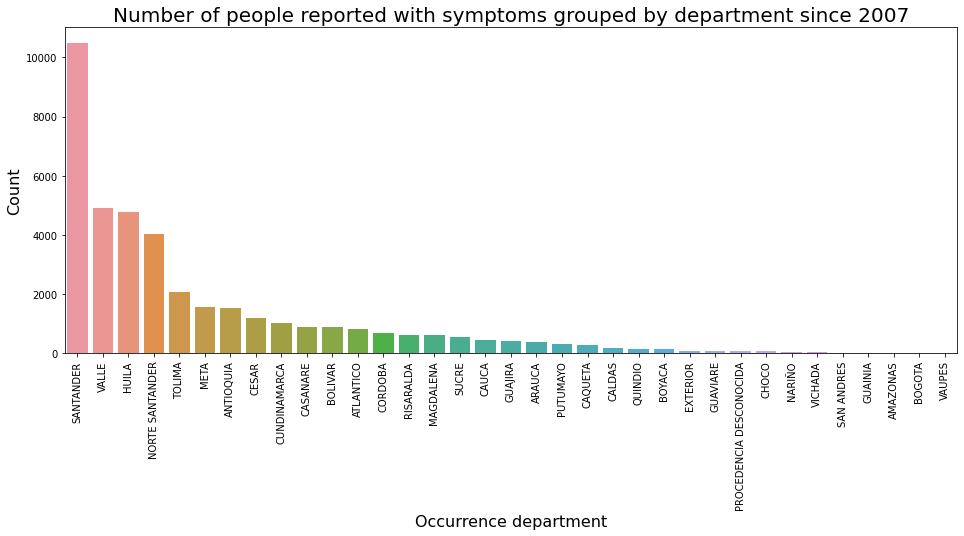

In [36]:
reportados = dengue_res[['Departamento_ocurrencia','confirmados']]
reportados_dep = reportados.groupby(['Departamento_ocurrencia']).count().sort_values('confirmados',ascending=False)
reportados_dep.reset_index(inplace = True)

plt.figure(figsize=(16, 6))
sns.barplot(data=reportados_dep, x="Departamento_ocurrencia", y= 'confirmados')
plt.xticks(rotation=90)
plt.xlabel('Occurrence department',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Number of people reported with symptoms grouped by department since 2007',fontsize=20)
plt.show()

The second graph was made by the number of people confirmed with dengue and grouped by ocurrence department between 2007 and 2018.


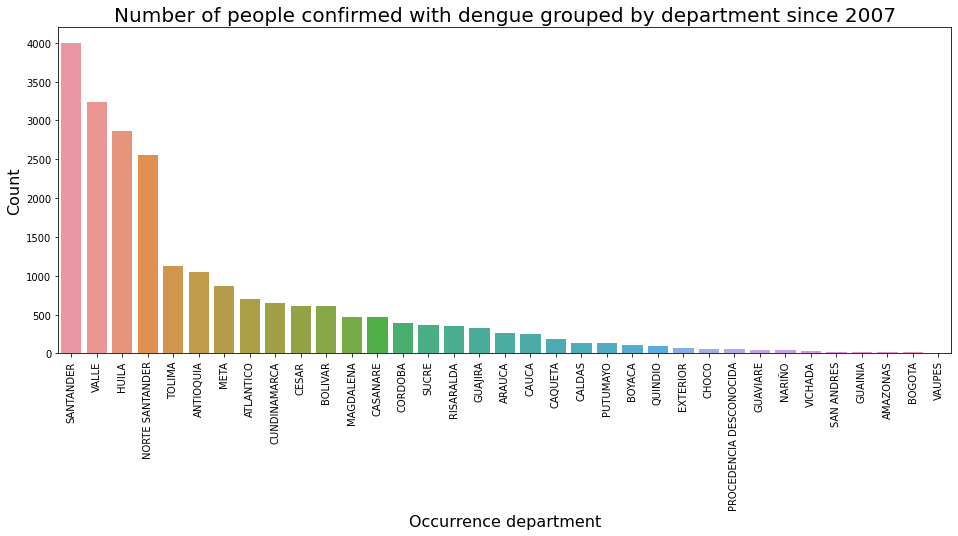

In [37]:
confirmados = dengue_res[['Departamento_ocurrencia','confirmados']]
confirmados_dep = confirmados.groupby(['Departamento_ocurrencia']).sum().sort_values('confirmados',ascending=False)
confirmados_dep.reset_index(inplace = True)

plt.figure(figsize=(16, 6))
sns.barplot(data=confirmados_dep, x="Departamento_ocurrencia", y = 'confirmados')
plt.xticks(rotation=90)
plt.xlabel('Occurrence department',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Number of people confirmed with dengue grouped by department since 2007',fontsize=20)
plt.show()

The third graph was made by the number of people died by dengue and grouped by ocurrence department between 2007 and 2018.


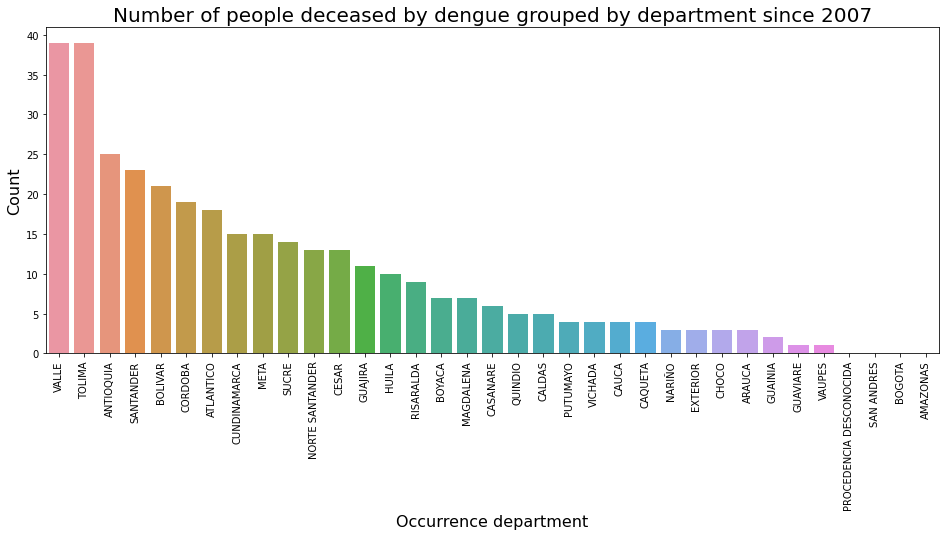

In [38]:
fallecidos=dengue_res[['Departamento_ocurrencia','FEC_DEF']]
fallecidos_dep = fallecidos.groupby(['Departamento_ocurrencia']).count().sort_values('FEC_DEF',ascending=False)
fallecidos_dep.reset_index(inplace = True)

plt.figure(figsize=(16, 6))
sns.barplot(data=fallecidos_dep, x="Departamento_ocurrencia", y = 'FEC_DEF')
plt.xticks(rotation=90)
plt.xlabel('Occurrence department',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Number of people deceased by dengue grouped by department since 2007',fontsize=20)
plt.show()

In oder to continue with the EDA, a graph with the number of people confirmed was made grouped by municipality. 


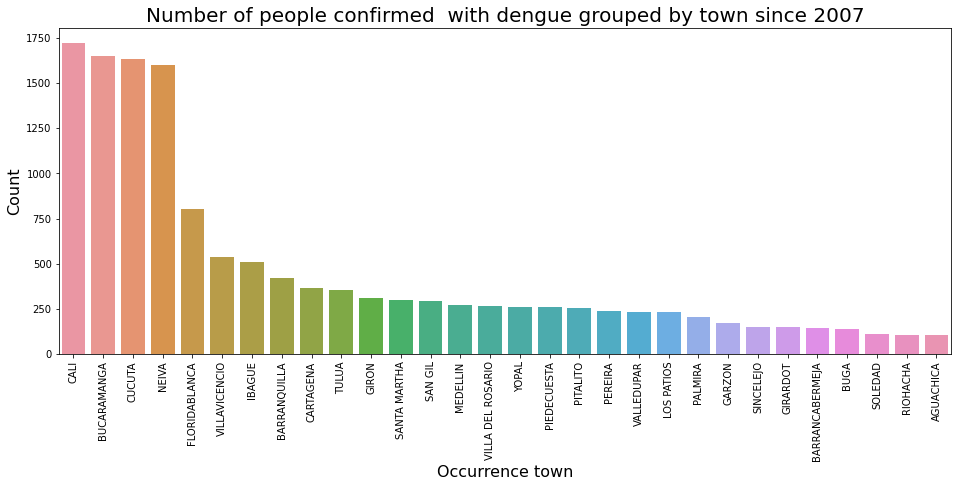

In [39]:
confirmados=dengue_res[['Departamento_ocurrencia','Municipio_ocurrencia','confirmados']]
confirmados_ciudad = confirmados.groupby(['Departamento_ocurrencia','Municipio_ocurrencia']).sum().sort_values('confirmados',ascending=False)
confirmados_ciudad.reset_index(inplace = True)
confirmados_ciudad.drop('Departamento_ocurrencia',inplace=True,axis = 1)
confirmados_graf = confirmados_ciudad[:30]

plt.figure(figsize=(16, 6))
sns.barplot(data=confirmados_graf, x="Municipio_ocurrencia", y = 'confirmados')
plt.xticks(rotation=90)
plt.xlabel('Occurrence town',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Number of people confirmed  with dengue grouped by town since 2007',fontsize=20)
plt.show()

To track down the number of people confirmed along the years since 2007 to 2018. The graph bellow shows the behave of Dengue and the decrease of people confirmed in the last years.


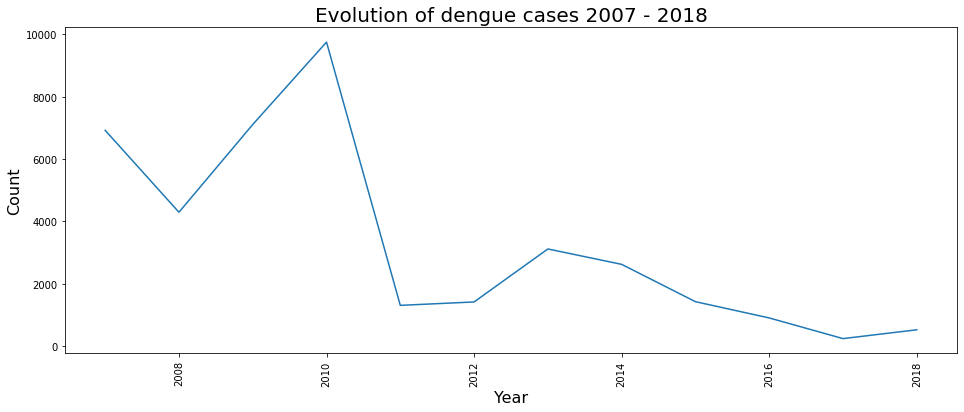

In [40]:
confirmados=dengue_res[['ANO','confirmados']]
confirmados_dep = confirmados.groupby(['ANO']).count()
confirmados_dep.reset_index(inplace = True)

plt.figure(figsize=(16, 6))
sns.lineplot(data=confirmados_dep, x="ANO", y = 'confirmados')
plt.xticks(rotation=90)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Evolution of dengue cases 2007 - 2018',fontsize=20)
plt.show()


To discover the number of people confirmed by the grouped month the next graph was made.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


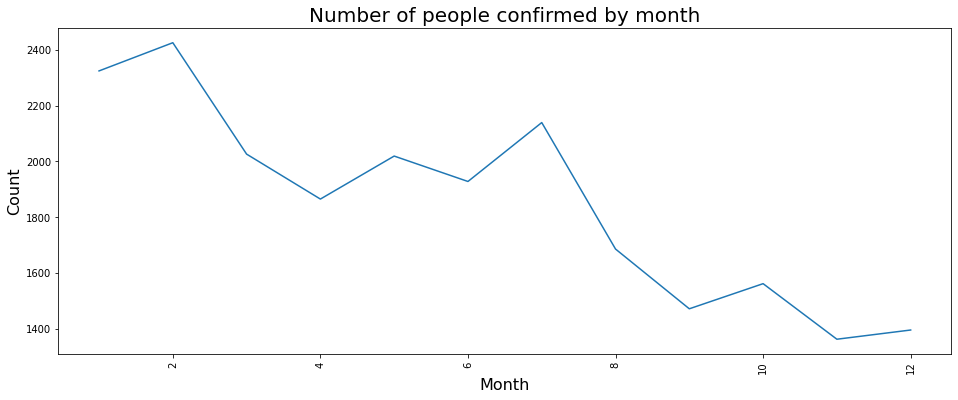

In [41]:
dengue_res
dengue_res['Fecha'] = pd.to_datetime(dengue_res['FEC_CON'], format = '%Y-%m-%d')
dengue_res['Mes'] = dengue_res['Fecha'].dt.month
casos_temp = dengue_res[['Mes','confirmados']]
casos_mes = casos_temp.groupby('Mes').sum()
casos_mes

plt.figure(figsize=(16, 6))
sns.lineplot(data=casos_mes, x=casos_mes.index, y = 'confirmados')
plt.xticks(rotation=90)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Number of people confirmed by month',fontsize=20)
plt.show()

Finally, an EDA over the gender and the age was made to find some trend on this variables. The graphs bellow shows the behave of this variables by people confirmed

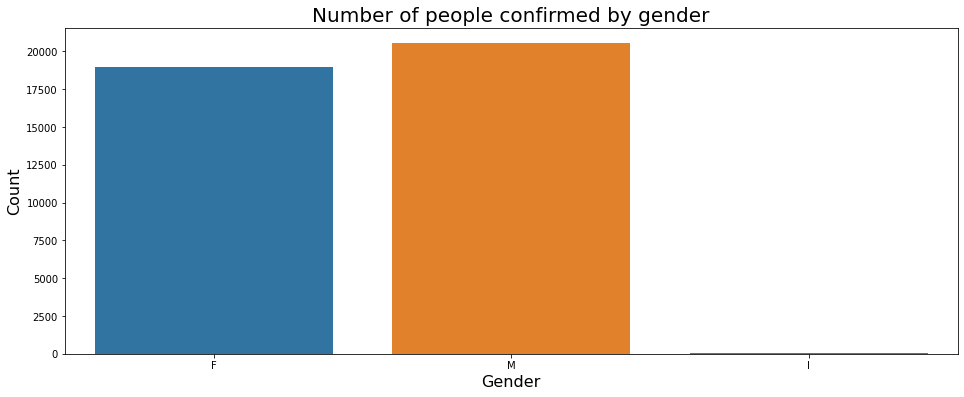

In [42]:
plt.figure(figsize=(16, 6))
sns.countplot(data=dengue_res, x="SEXO")
# plt.xticks(rotation=90)
plt.xlabel('Gender',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Number of people confirmed by gender',fontsize=20)
plt.show()

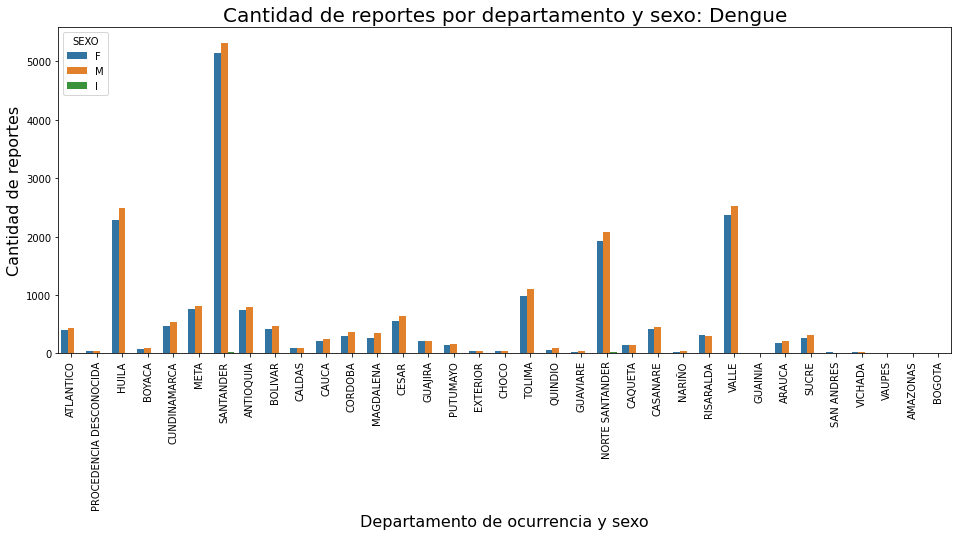

In [43]:
plt.figure(figsize=(16, 6))
sns.countplot(data=dengue_res, x="Departamento_ocurrencia",hue='SEXO')
plt.xticks(rotation=90)
plt.xlabel('Departamento de ocurrencia y sexo',fontsize=16)
plt.ylabel('Cantidad de reportes',fontsize=16)
plt.title('Cantidad de reportes por departamento y sexo: Dengue',fontsize=20)
plt.show()

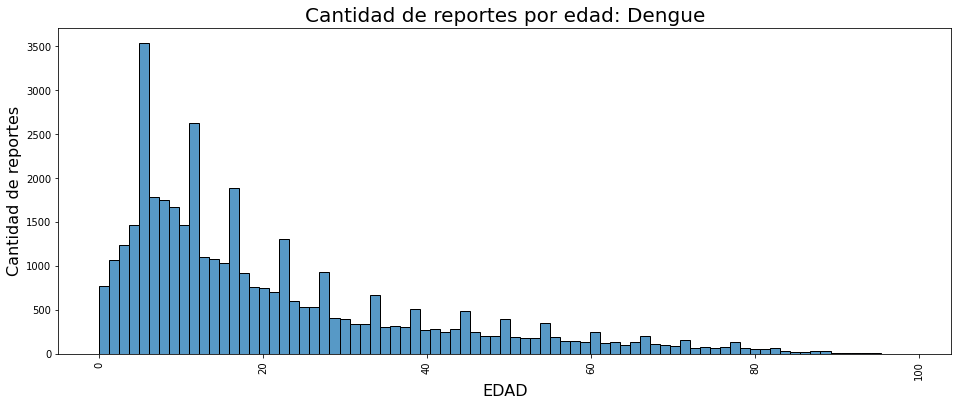

In [44]:
plt.figure(figsize=(16, 6))
sns.histplot(data=dengue_res, x="EDAD")
plt.xticks(rotation=90)
plt.xlabel('EDAD',fontsize=16)
plt.ylabel('Cantidad de reportes',fontsize=16)
plt.title('Cantidad de reportes por edad: Dengue',fontsize=20)
plt.show()

# **Extrapulmonary tuberculosis**

After the extra pulmonary tuberculosis databases are loaded, this information has been downloaded from the National Institute of Health on the [Sivigila portal](https://portalsivigila.ins.gov.co/Paginas/Buscador.aspx#).

In [75]:
texpul2018 = pd.read_csv(r'data/tuberculosis_2018.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2017 = pd.read_csv(r'data/tuberculosis_2017.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2016 = pd.read_csv(r'data/tuberculosis_2016.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2015 = pd.read_csv(r'data/tuberculosis_2015.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2014 = pd.read_csv(r'data/tuberculosis_2014.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2013 = pd.read_csv(r'data/tuberculosis_2013.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2012 = pd.read_csv(r'data/tuberculosis_2012.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2011 = pd.read_csv(r'data/tuberculosis_2011.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2010 = pd.read_csv(r'data/tuberculosis_2010.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2009 = pd.read_csv(r'data/tuberculosis_2009.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2008 = pd.read_csv(r'data/tuberculosis_2008.csv', delimiter=',', encoding = 'ISO-8859-1')
texpul2007 = pd.read_csv(r'data/tuberculosis_2007.csv', delimiter=',', encoding = 'ISO-8859-1')

We drop some variables that are only informative and we are not going to use on the future model.

In [76]:
texpul2018n=texpul2018.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','BAR_VER','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','VERSION','Evento',
                              'GRU_POB'],axis=1)
texpul2017n=texpul2017.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2016n=texpul2016.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2015n=texpul2015.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2014n=texpul2014.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2013n=texpul2013.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2012n=texpul2012.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2011n=texpul2011.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2010n=texpul2010.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2009n=texpul2009.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2008n=texpul2008.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)
texpul2007n=texpul2007.drop(['CONSECUTIVE','LOCALIDAD','CEN_POBLA','VEREDA','COD_ASE',
                              'COD_DPTO_N','COD_MUN_N','FECHA_NTO','CER_DEF','CBMTE','FEC_ARC_XL',
                              'FEC_AJU','FM_UNIDAD','FM_GRADO','Evento',
                              'GRU_POB','Nombre_UPGD','Departamento_notificacion',
                             'Municipio_Notificacion','va_sispro'],axis=1)

And make changes for the name of variables that change over time, for example in 2018 we change the variable name *estado_final_de_caso* to *nom_est_f_caso*

In [77]:
texpul2018n=texpul2018n.rename(columns={'estado_final_de_caso':'nom_est_f_caso'})
texpul=pd.concat([texpul2018n,texpul2017n,texpul2016n,texpul2015n,texpul2014n,texpul2013n,texpul2012n,
                  texpul2011n,texpul2010n,texpul2009n,texpul2008n,texpul2007n])
texpul.head(4)

COD_EVE     FEC_NOT  SEMANA   ANO    COD_PRE  COD_SUB  EDAD  UNI_MED SEXO  \
0      810  2018-07-24      30  2018  536002107        1    31        1    M   
1      810  2018-11-03      44  2018  536002107        1    25        1    F   
2      810  2018-03-01       9  2018  500104259       19    18        1    M   
3      810  2018-06-06      22  2018  500102172        3    32        1    M   

   COD_PAIS_O  COD_DPTO_O  COD_MUN_O  AREA  OCUPACION TIP_SS  PER_ETN  \
0         170           5          1     1       3230      C        6   
1         170           5          1     1       9996      C        6   
2         170           5          1     1       9997      C        6   
3         170           5          1     1       9999      C        6   

   GP_DISCAPA  GP_DESPLAZ  GP_MIGRANT  GP_CARCELA  GP_GESTAN  GP_INDIGEN  \
0           2           2           2           2          2           2   
1           2           2           2           2          2           2   
2           2           2           2           2          2           2   
3           2           2           2           2          2           2   

   GP_POBICFB  GP_MAD_COM  GP_DESMOVI  GP_PSIQUIA  GP_VIC_VIO  GP_OTROS  \
0           2           2           2           2           2         1   
1           2           2           2           2           2         1   
2           2           2           2           2           2         1   
3           2           2           2           2           2         1   

   COD_DPTO_R  COD_MUN_R     FEC_CON     INI_SIN  TIP_CAS  PAC_HOS  \
0           5        360  2018-07-24  2018-06-20        4        1   
1           5        360  2018-11-03  2018-11-03        3        1   
2           5          1  2018-02-26  2018-01-05        4        2   
3           5          1  2018-06-02  2018-05-23        3        1   

      FEC_HOS  CON_FIN FEC_DEF  AJUSTE FM_FUERZA  confirmados  est_f_caso  \
0  2018-07-25        1     NaN       7       NaN            1           4   
1  2018-11-03        1     NaN       7       NaN            1           3   
2         NaN        1     NaN       0       NaN            1           4   
3  2018-06-02        1     NaN       7       NaN            1           3   

               nom_est_f_caso Departanento_ocurrencia Municipio_ocurrencia  \
0      Confirmado por Clínica               ANTIOQUIA             MEDELLIN   
1  Confirmado por laboratorio               ANTIOQUIA             MEDELLIN   
2      Confirmado por Clínica               ANTIOQUIA             MEDELLIN   
3  Confirmado por laboratorio               ANTIOQUIA             MEDELLIN   

  Departamento_residencia Municipio_residencia Departamento_ocurrencia  
0               ANTIOQUIA               ITAGUI                     NaN  
1               ANTIOQUIA               ITAGUI                     NaN  
2               ANTIOQUIA             MEDELLIN                     NaN  
3               ANTIOQUIA             MEDELLIN                     NaN

Then we check if there's any null value on the dataset.

In [78]:
texpul.isnull().any()

COD_EVE                    False
FEC_NOT                    False
SEMANA                     False
ANO                        False
COD_PRE                    False
COD_SUB                    False
EDAD                       False
UNI_MED                    False
SEXO                       False
COD_PAIS_O                 False
COD_DPTO_O                 False
COD_MUN_O                  False
AREA                       False
OCUPACION                  False
TIP_SS                     False
PER_ETN                    False
GP_DISCAPA                 False
GP_DESPLAZ                 False
GP_MIGRANT                 False
GP_CARCELA                 False
GP_GESTAN                  False
GP_INDIGEN                 False
GP_POBICFB                 False
GP_MAD_COM                 False
GP_DESMOVI                 False
GP_PSIQUIA                 False
GP_VIC_VIO                 False
GP_OTROS                   False
COD_DPTO_R                 False
COD_MUN_R                  False
FEC_CON   

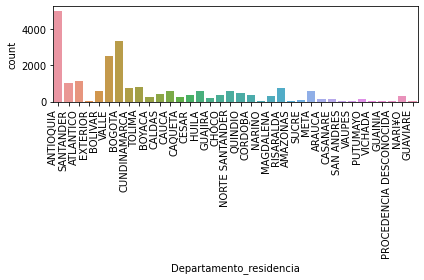

In [79]:
ax=sns.countplot(x='Departamento_residencia',data=texpul)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

We can see here, which department is the one with most cases of extrapulmonar tuberculosis.

In [80]:
confirmados=texpul[['Departamento_residencia','confirmados']]
confirmados.groupby(['Departamento_residencia']).sum().sort_values('confirmados',ascending=False)

confirmados
Departamento_residencia             
ANTIOQUIA                       5017
BOGOTA                          3346
VALLE                           2529
ATLANTICO                       1122
SANTANDER                       1005
TOLIMA                           810
RISARALDA                        764
CUNDINAMARCA                     736
NORTE SANTANDER                  593
META                             584
HUILA                            583
BOLIVAR                          579
CAUCA                            573
QUINDIO                          490
CALDAS                           433
CORDOBA                          381
CESAR                            372
CHOCO                            367
MAGDALENA                        307
NARI¥O                           303
BOYACA                           265
CAQUETA                          234
GUAJIRA                          217
CASANARE                         161
PUTUMAYO                         157
ARAUCA                           128
SUCRE                             76
AMAZONAS                          52
EXTERIOR                          36
NARIÑO                            31
VAUPES                            28
GUAVIARE                          23
VICHADA                           20
SAN ANDRES                        14
GUAINIA                           10
PROCEDENCIA DESCONOCIDA            5

Also we can check which city or town has the most cases of extrapulmonar tuberculosis over time

In [81]:
confirmados=texpul[['Departamento_residencia','Municipio_residencia','confirmados']]
confirmados.groupby(['Departamento_residencia','Municipio_residencia']).sum().sort_values('confirmados',ascending=False)

confirmados
Departamento_residencia Municipio_residencia             
BOGOTA                  BOGOTA                       3346
ANTIOQUIA               MEDELLIN                     3115
VALLE                   CALI                         1569
ATLANTICO               BARRANQUILLA                  686
TOLIMA                  IBAGUE                        558
...                                                   ...
BOLIVAR                 CLEMENCIA                       1
                        EL PE¥ON                        1
                        HATILLO DE LOBA                 1
GUAVIARE                MIRAFLORES                      1
VICHADA                 SANTA ROSALIA                   1

[960 rows x 1 columns]

In [82]:
texpul.loc[(texpul.FM_FUERZA == 3.0),'FM_FUERZA']='3'
texpul.loc[(texpul.FM_FUERZA == 4.0),'FM_FUERZA']='4'
texpul.loc[(texpul.FM_FUERZA == 5.0),'FM_FUERZA']='5'
texpul.loc[(texpul.FM_FUERZA == 8.0),'FM_FUERZA']='8'
texpul.loc[(texpul.FM_FUERZA == 7.0),'FM_FUERZA']='7'
texpul.loc[(texpul.FM_FUERZA == ' ') | (texpul.FM_FUERZA == 'nan'),'FM_FUERZA']=np.NaN

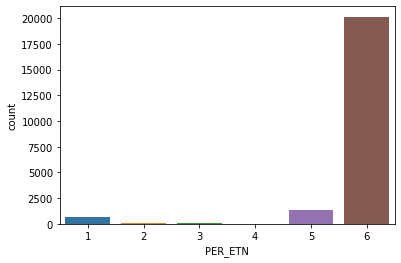

In [54]:
ax=sns.countplot(x='PER_ETN',data=texpul)

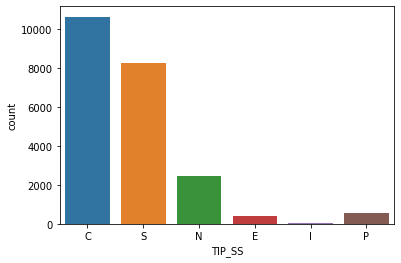

In [55]:
ax=sns.countplot(x='TIP_SS',data=texpul)

Next, we can see the variety of cases over age and unit mesure.

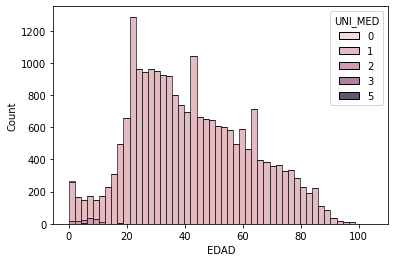

In [56]:
sns.histplot(data=texpul, x="EDAD", hue='UNI_MED', multiple="stack")


And the difference of cases with age and sex. 

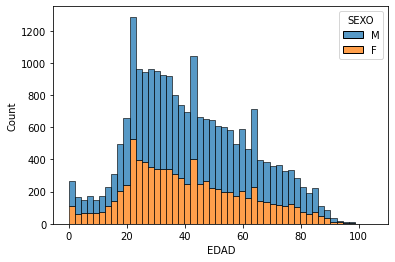

In [57]:
sns.histplot(data=texpul, x="EDAD", hue='SEXO', multiple="stack")

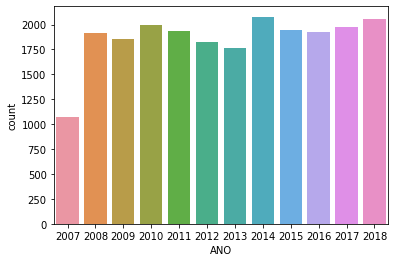

In [58]:
ax=sns.countplot(x='ANO',data=texpul)

**Time series**

In [59]:
df_texpul=texpul[['FEC_NOT','confirmados']]
df_texpul['MES']=pd.DatetimeIndex(df_texpul['FEC_NOT']).month
df_texpul['ANO']=pd.DatetimeIndex(df_texpul['FEC_NOT']).year
df_texpul

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


FEC_NOT  confirmados  MES   ANO
0     2018-07-24            1    7  2018
1     2018-11-03            1   11  2018
2     2018-03-01            1    3  2018
3     2018-06-06            1    6  2018
4     2018-11-07            1   11  2018
...          ...          ...  ...   ...
1072  2008-01-17            1    1  2008
1073  2007-04-28            1    4  2007
1074  2007-02-08            1    2  2007
1075  2008-04-08            1    4  2008
1076  2007-02-08            1    2  2007

[22351 rows x 4 columns]

In [60]:
df_texpul['FECHA'] = df_texpul['ANO'].map(str)+"-" + df_texpul['MES'].map(str)
df_texpul.sort_values('FECHA')
df_texpul=df_texpul.groupby(['FECHA'])['confirmados'].sum().reset_index().sort_values('FECHA')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


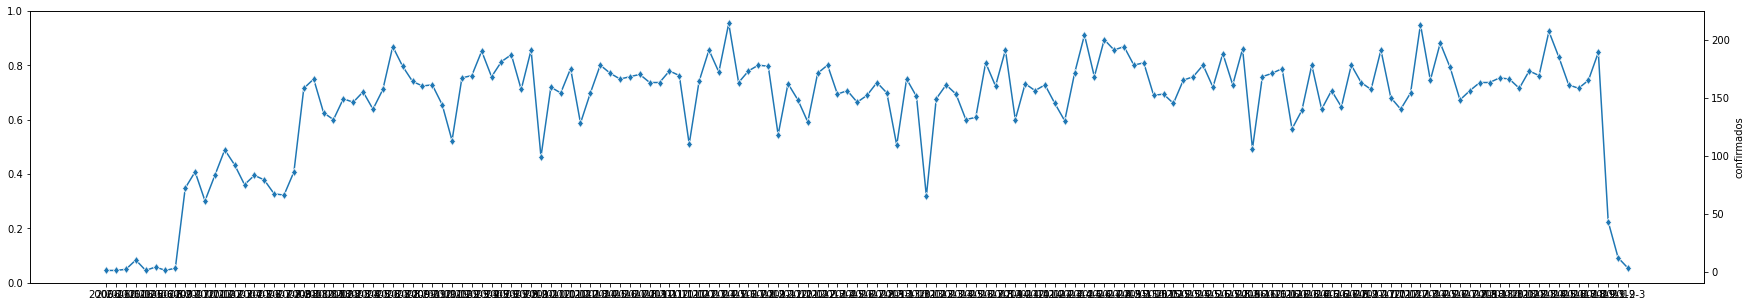

In [61]:
fig, ax1 = plt.subplots(figsize=(30,5))
ax2=ax1.twinx()
sns.lineplot(x='FECHA',y='confirmados', data=df_texpul, marker='d', ax=ax2)
plt.show()

# **Heat maps**

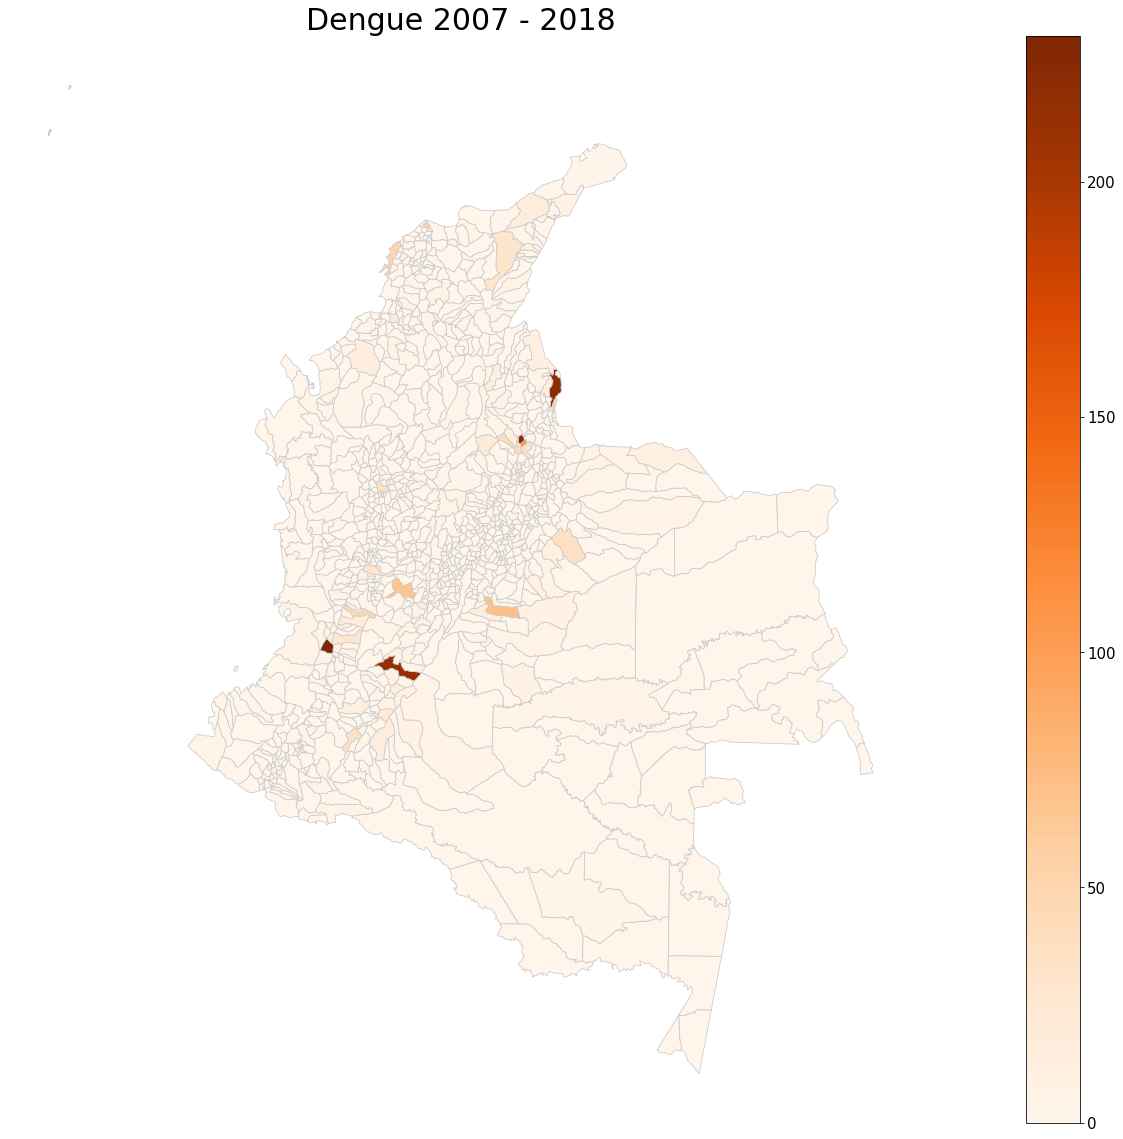

In [62]:
confirmados=dengue_res[['Municipio_ocurrencia','confirmados']]
data=confirmados.groupby(['Municipio_ocurrencia']).sum().sort_values('confirmados',ascending=False).reset_index()
data=data.rename(columns={'Municipio_ocurrencia':'NOMBRE_MPI'})
merged = regions.set_index('NOMBRE_MPI').join(data.set_index('NOMBRE_MPI'))
merged = merged.reset_index()
merged = merged.fillna(0)
# merged.head(4)

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Dengue 2007 - 2018', fontdict={'fontsize': '30', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=15)
merged.plot('confirmados', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
plt.show()

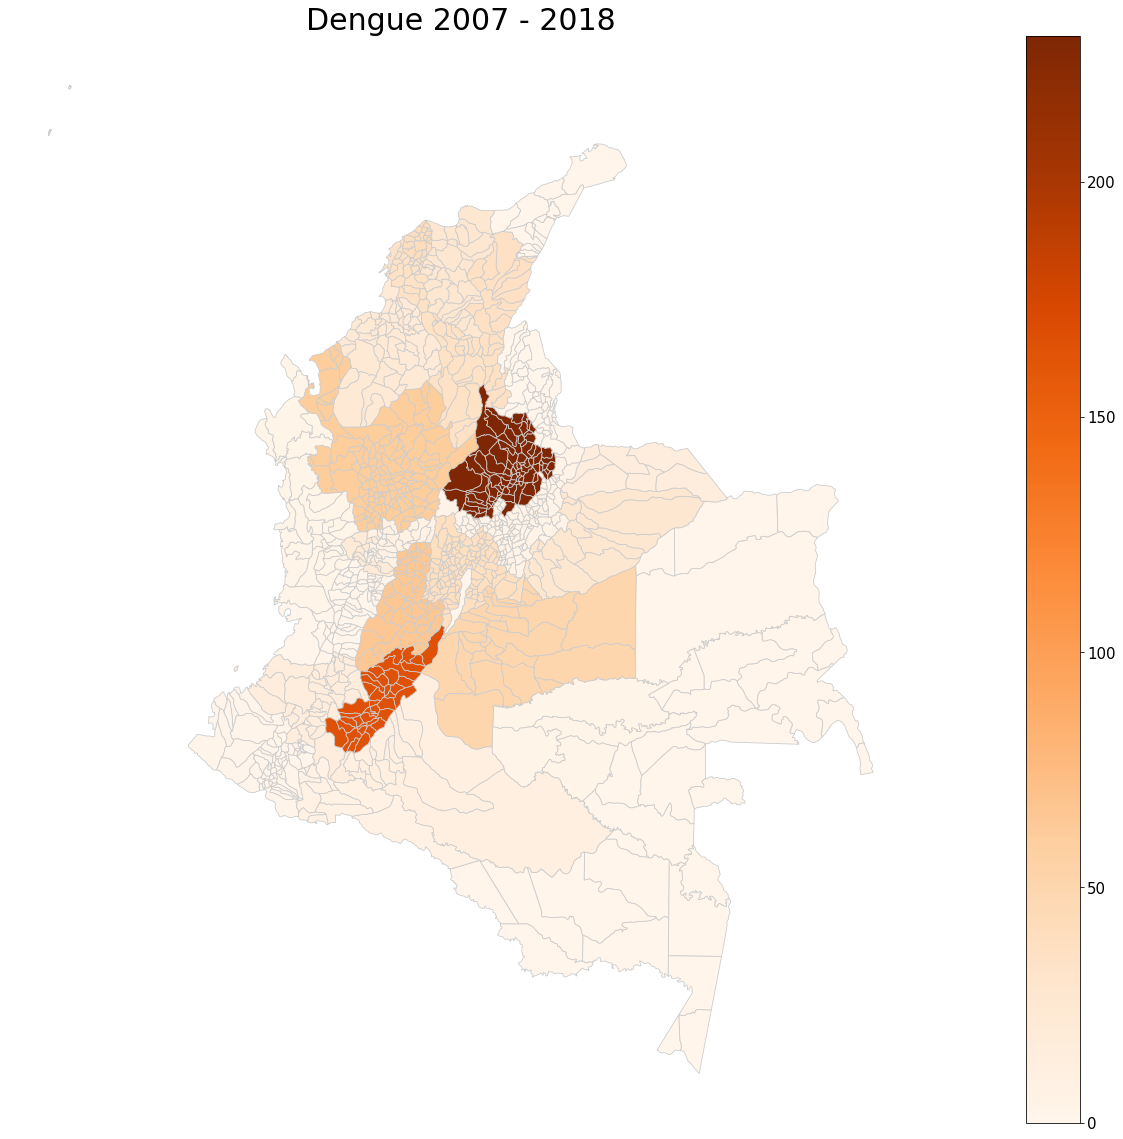

In [63]:
confirmados=dengue_res[['Departamento_ocurrencia','confirmados']]
data=confirmados.groupby(['Departamento_ocurrencia']).sum().sort_values('confirmados',ascending=False).reset_index()
data=data.rename(columns={'Departamento_ocurrencia':'NOMBRE_DPT'})
merged = regions.set_index('NOMBRE_DPT').join(data.set_index('NOMBRE_DPT'))
merged = merged.reset_index()
merged = merged.fillna(0)
# merged

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Dengue 2007 - 2018', fontdict={'fontsize': '30', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=15)
merged.plot('confirmados', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
plt.show()

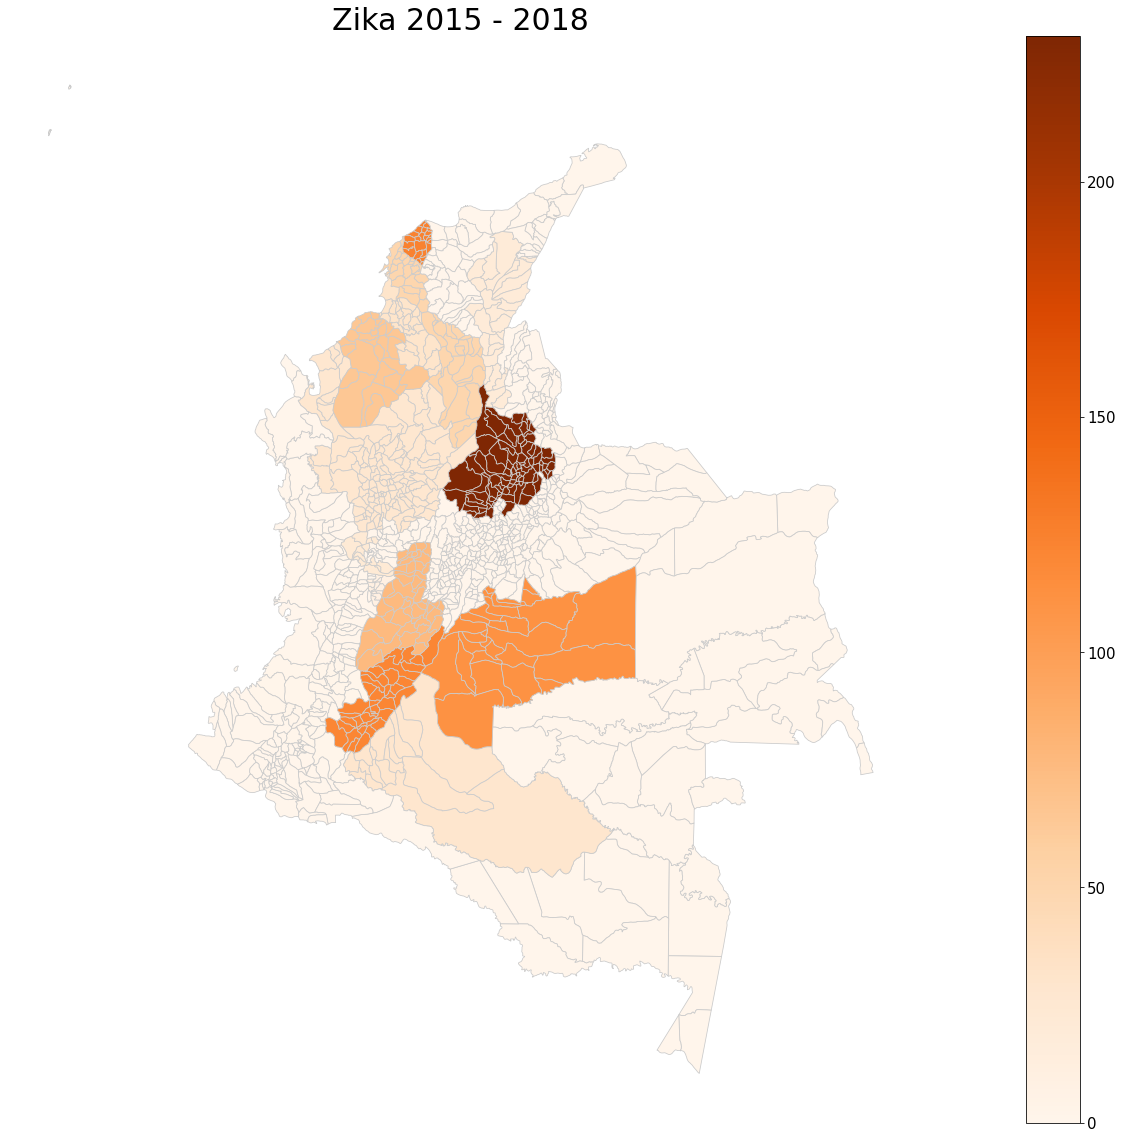

In [65]:
zika_res = zika[['FEC_CON','ANO','EDAD','SEXO','FEC_DEF','confirmados','Departamento_ocurrencia','Municipio_ocurrencia']]

confirmados=zika_res[['Departamento_ocurrencia','confirmados']]
data=confirmados.groupby(['Departamento_ocurrencia']).sum().sort_values('confirmados',ascending=False).reset_index()
data=data.rename(columns={'Departamento_ocurrencia':'NOMBRE_DPT'})
merged = regions.set_index('NOMBRE_DPT').join(data.set_index('NOMBRE_DPT'))
merged = merged.reset_index()
merged = merged.fillna(0)
# merged.head(4)

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Zika 2015 - 2018', fontdict={'fontsize': '30', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=15)
merged.plot('confirmados', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
plt.show()

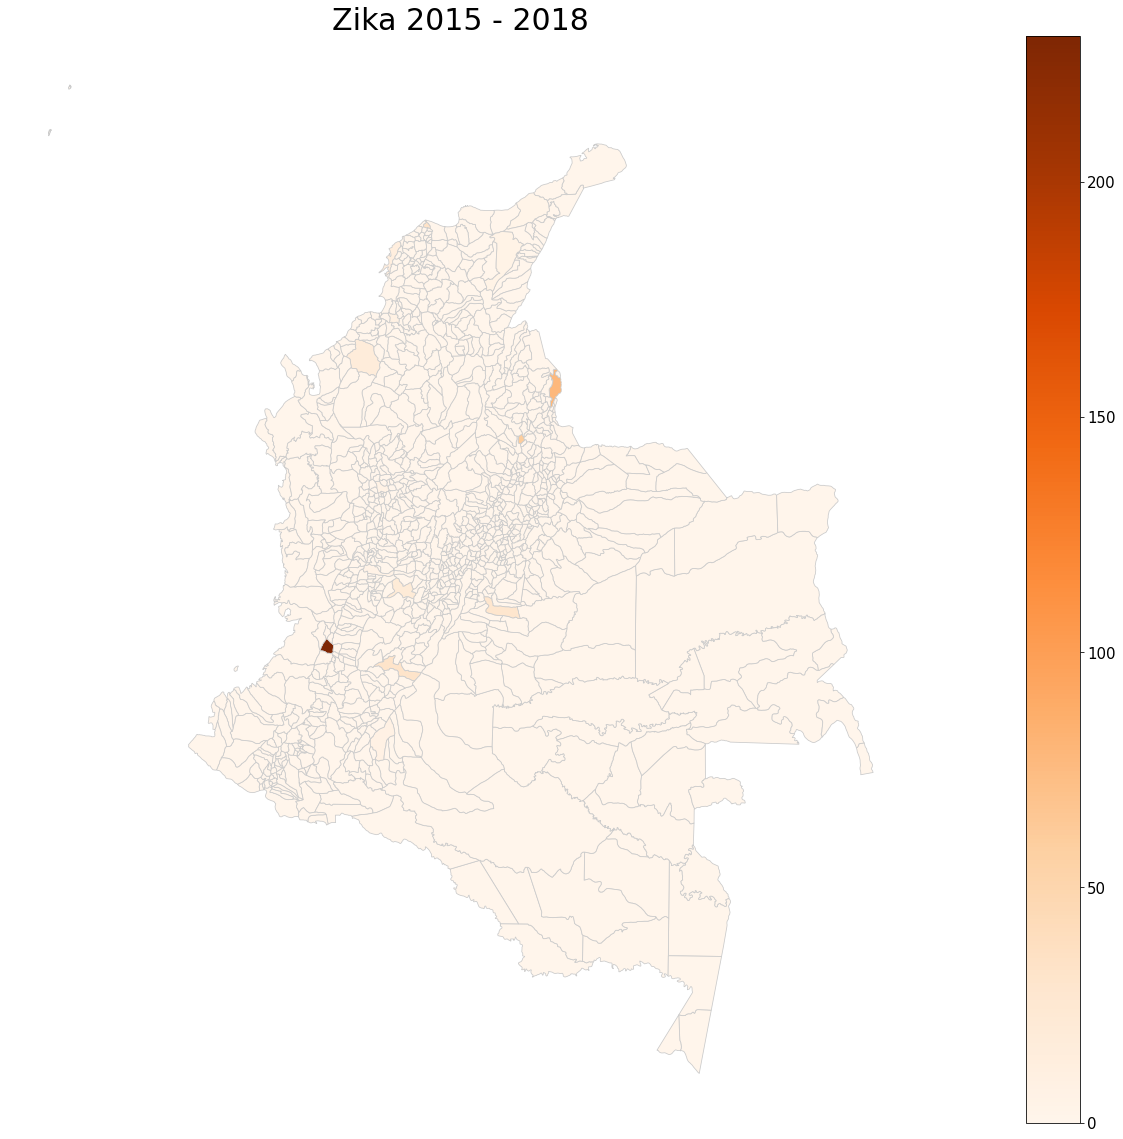

In [66]:
confirmados=zika_res[['Municipio_ocurrencia','confirmados']]
data=confirmados.groupby(['Municipio_ocurrencia']).sum().sort_values('confirmados',ascending=False).reset_index()
data=data.rename(columns={'Municipio_ocurrencia':'NOMBRE_MPI'})
merged = regions.set_index('NOMBRE_MPI').join(data.set_index('NOMBRE_MPI'))
merged = merged.reset_index()
merged = merged.fillna(0)
# merged.head(4)

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Zika 2015 - 2018', fontdict={'fontsize': '30', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=15)
merged.plot('confirmados', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
plt.show()

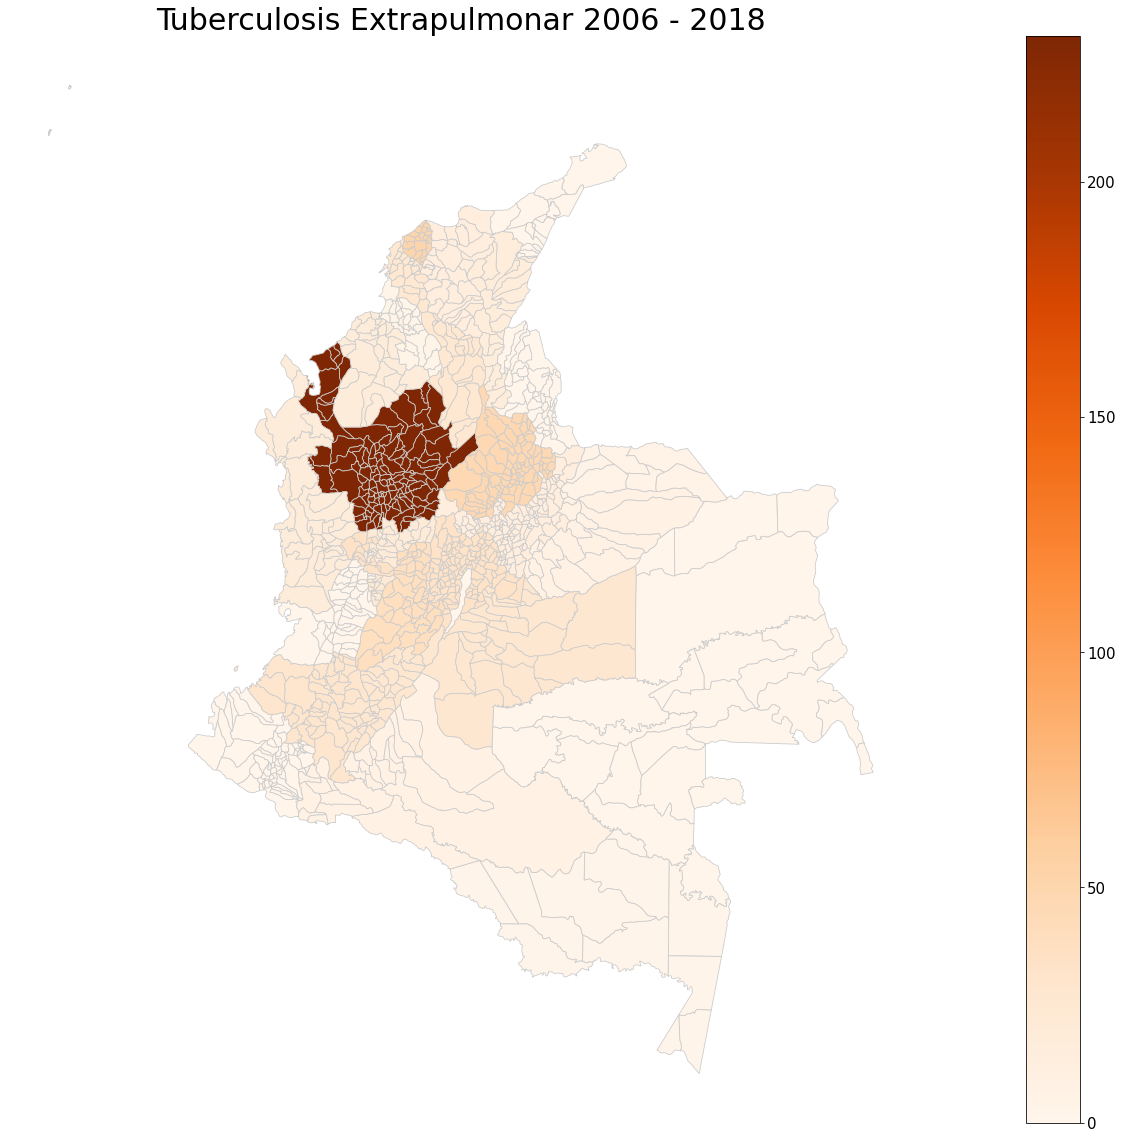

In [83]:
texpul_res = texpul[['FEC_CON','ANO','EDAD','SEXO','FEC_DEF','confirmados','Departamento_ocurrencia','Municipio_ocurrencia']]


confirmados=texpul_res[['Departamento_ocurrencia','confirmados']]
data=confirmados.groupby(['Departamento_ocurrencia']).sum().sort_values('confirmados',ascending=False).reset_index()
data=data.rename(columns={'Departamento_ocurrencia':'NOMBRE_DPT'})
merged = regions.set_index('NOMBRE_DPT').join(data.set_index('NOMBRE_DPT'))
merged = merged.reset_index()
merged = merged.fillna(0)
# merged.head(4)

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Tuberculosis Extrapulmonar 2006 - 2018', fontdict={'fontsize': '30', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=15)
merged.plot('confirmados', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
plt.show()

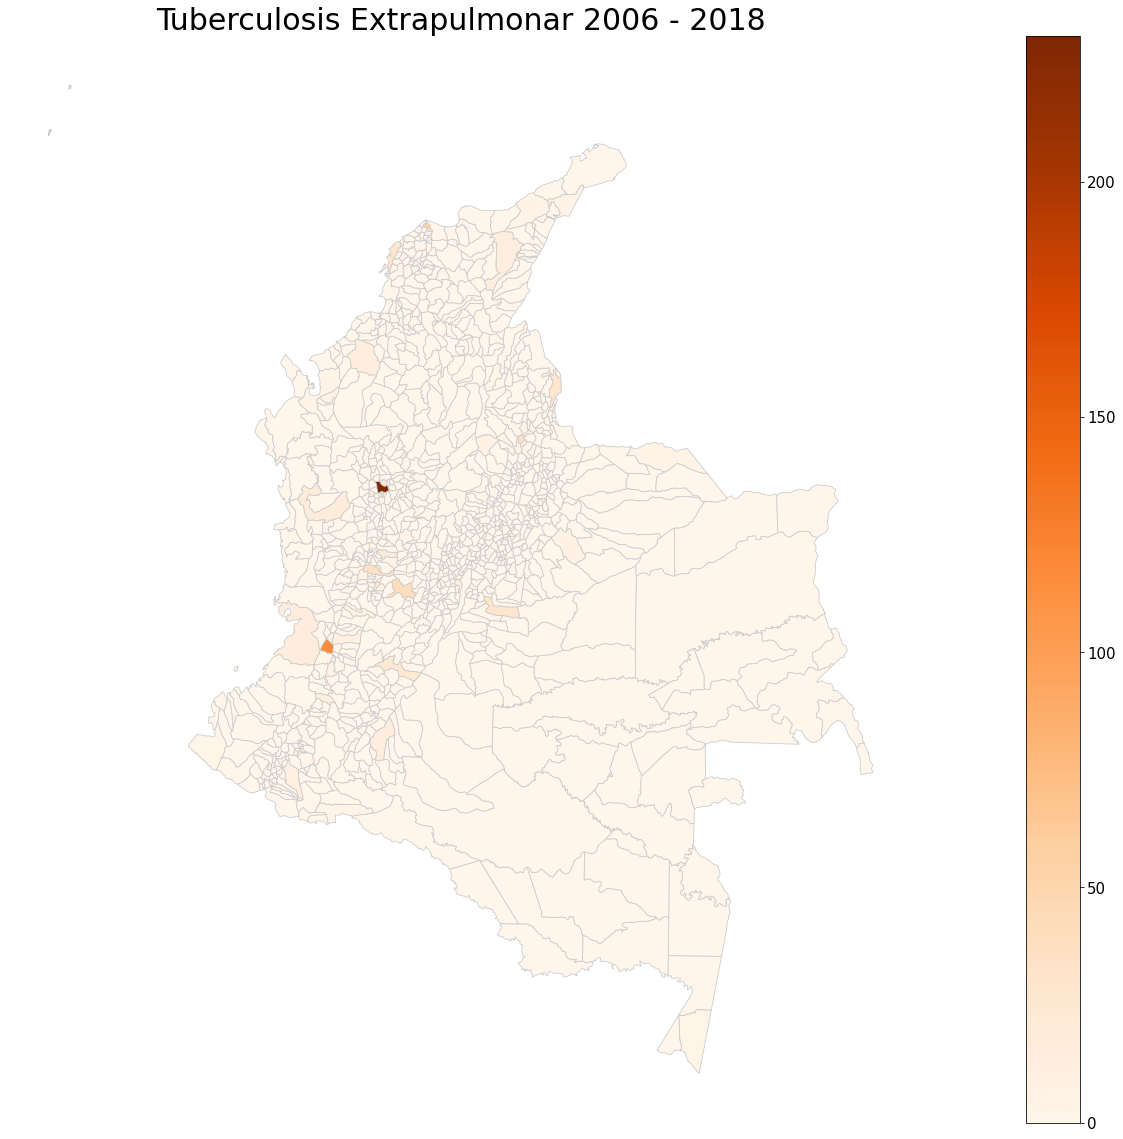

In [84]:
confirmados=texpul_res[['Municipio_ocurrencia','confirmados']]
data=confirmados.groupby(['Municipio_ocurrencia']).sum().sort_values('confirmados',ascending=False).reset_index()
data=data.rename(columns={'Municipio_ocurrencia':'NOMBRE_MPI'})
merged = regions.set_index('NOMBRE_MPI').join(data.set_index('NOMBRE_MPI'))
merged = merged.reset_index()
merged = merged.fillna(0)
# merged.head(4)

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Tuberculosis Extrapulmonar 2006 - 2018', fontdict={'fontsize': '30', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=15)
merged.plot('confirmados', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
plt.show()

# **Poverty and inequality**

In [85]:
Hogares2019 = pd.read_csv(r'data/poverty_2019.csv', delimiter=";", encoding = "UTF-8")
Hogares2018 = pd.read_csv(r'data/poverty_2018.csv', delimiter=";", encoding = "UTF-8")
Hogares2017 = pd.read_csv(r'data/poverty_2017.csv', delimiter=";", encoding = "UTF-8")
Hogares2016 = pd.read_table('data/poverty_2016.txt')
Hogares2015 = pd.read_table('data/poverty_2015.txt')
Hogares2014 = pd.read_table('data/poverty_2014.txt')
Hogares2013 = pd.read_table('data/poverty_2013.txt')
Hogares2012 = pd.read_table('data/poverty_2012.txt')
Hogares2011 = pd.read_table('data/poverty_2011.txt')

In [86]:
Hogares2019.columns = Hogares2019.columns.str.lower()
Hogares2018.columns = Hogares2018.columns.str.lower()
Hogares2017.columns = Hogares2017.columns.str.lower()
Hogares2016.columns = Hogares2016.columns.str.lower()
Hogares2015.columns = Hogares2015.columns.str.lower()
Hogares2014.columns = Hogares2014.columns.str.lower()
Hogares2013.columns = Hogares2013.columns.str.lower()
Hogares2012.columns = Hogares2012.columns.str.lower()
Hogares2011.columns = Hogares2011.columns.str.lower()

Create a new column with the year.

In [87]:
Hogares2019['year'] = 2019
Hogares2018['year'] = 2018
Hogares2017['year'] = 2017
Hogares2016['year'] = 2016
Hogares2015['year'] = 2015
Hogares2014['year'] = 2014
Hogares2013['year'] = 2013
Hogares2012['year'] = 2012
Hogares2011['year'] = 2011
Hogares2019['fecha'] = pd.to_datetime(dict(year=Hogares2019["year"], month=Hogares2019["mes"],day = 1))
Hogares2018['fecha'] = pd.to_datetime(dict(year=Hogares2018["year"], month=Hogares2018["mes"],day = 1))
Hogares2017['fecha'] = pd.to_datetime(dict(year=Hogares2017["year"], month=Hogares2017["mes"],day = 1))
Hogares2016['fecha'] = pd.to_datetime(dict(year=Hogares2016["year"], month=Hogares2016["mes"],day = 1))
Hogares2015['fecha'] = pd.to_datetime(dict(year=Hogares2015["year"], month=Hogares2015["mes"], day = 1))
Hogares2014['fecha'] = pd.to_datetime(dict(year=Hogares2014["year"], month=Hogares2014["mes"],day = 1))
Hogares2013['fecha'] = pd.to_datetime(dict(year=Hogares2013["year"], month=Hogares2013["mes"],day = 1))
Hogares2012['fecha'] = pd.to_datetime(dict(year=Hogares2012["year"], month=Hogares2012["mes"],day = 1))
Hogares2011['fecha'] = pd.to_datetime(dict(year=Hogares2011["year"], month=Hogares2011["mes"],day = 1))

In [88]:
Hogares2019.head()

directorio  secuencia_p  mes  clase   dominio  p5000  p5010  p5090 p5100  \
0     4804535            1    1      1  MEDELLIN      3      3      1         
1     4804536            1    1      1  MEDELLIN      2      2      3         
2     4804537            1    1      1  MEDELLIN      4      3      3         
3     4804538            1    1      1  MEDELLIN      3      2      3         
4     4804539            1    1      1  MEDELLIN      2      1      1         

    p5130   p5140  nper  npersug          ingtotug       ingtotugarr  \
0  300000             3        3  1879150,66666667  2179150,66666667   
1          250000     2        2           4688211           4688211   
2          424000     5        5  2911536,33333333  2911536,33333333   
3          350000     4        4            680000            680000   
4  200000             2        2            888211           1088211   

            ingpcug           li                lp  pobre  indigente  npobres  \
0  726383,555555556  139923,6438  403378,075839062      0          0        0   
1         2344105,5  139923,6438  403378,075839062      0          0        0   
2  582307,266666667  139923,6438  403378,075839062      0          0        0   
3            170000  139923,6438  403378,075839062      1          0        4   
4          544105,5  139923,6438  403378,075839062      0          0        0   

   nindigentes             fex_c  year      fecha  
0            0  77,5521920539546  2019 2019-01-01  
1            0  91,4342596567505  2019 2019-01-01  
2            0   68,941458029955  2019 2019-01-01  
3            0  84,9387022178457  2019 2019-01-01  
4            0  80,8768041080175  2019 2019-01-01

Concat all the dataframes from year 2011 to 2019 and filter the main questions we are going to use.

In [89]:
Hogares = pd.concat([Hogares2019,Hogares2018,Hogares2017,Hogares2016,Hogares2015,Hogares2014,
                     Hogares2013,Hogares2012,Hogares2011])
Hogares=Hogares.drop(['p5000', 'p5010', 'p5090','p5100','fex_c','p5140','p5130'],axis=1)

The names of the cities need to be the same, so trasform all of then in lower case

In [90]:
Hogares['dominio'] = Hogares['dominio'].str.lower()

In [91]:
Hogares.isnull().any()

directorio     False
secuencia_p    False
mes            False
clase          False
dominio        False
nper           False
npersug        False
ingtotug        True
ingtotugarr     True
ingpcug        False
li             False
lp             False
pobre          False
indigente      False
npobres        False
nindigentes    False
year           False
fecha          False
depto           True
fex_dpto        True
dpto            True
fex_dpto_c      True
fex_c_a         True
fex_c_2011a     True
dtype: bool

Remove all the tildes from the cities names, to avoid mistakes.

In [92]:
Hogares['dominio'] = Hogares['dominio'].replace(['medellín'], 'medellin')
Hogares['dominio'] = Hogares['dominio'].replace(['bogotá'], 'bogota')
Hogares['dominio'] = Hogares['dominio'].replace(['popayán'], 'popayan')
Hogares['dominio'] = Hogares['dominio'].replace(['montería'], 'monteria')
Hogares['dominio'] = Hogares['dominio'].replace(['quíbdó'], 'quibdo')
Hogares['dominio'] = Hogares['dominio'].replace(['ibagué'], 'ibague')

In [93]:
Hogares['dominio'].unique()

array(['medellin', 'barranquilla', 'bogota', 'cartagena', 'tunja',
       'manizales', 'florencia', 'popayan', 'valledupar', 'monteria',
       'quibdo', 'neiva', 'riohacha', 'santa marta', 'villavicencio',
       'pasto', 'cucuta', 'armenia', 'pereira', 'bucaramanga',
       'sincelejo', 'ibague', 'cali', 'rural', 'resto urbano'],
      dtype=object)

**Size of the sample per city**

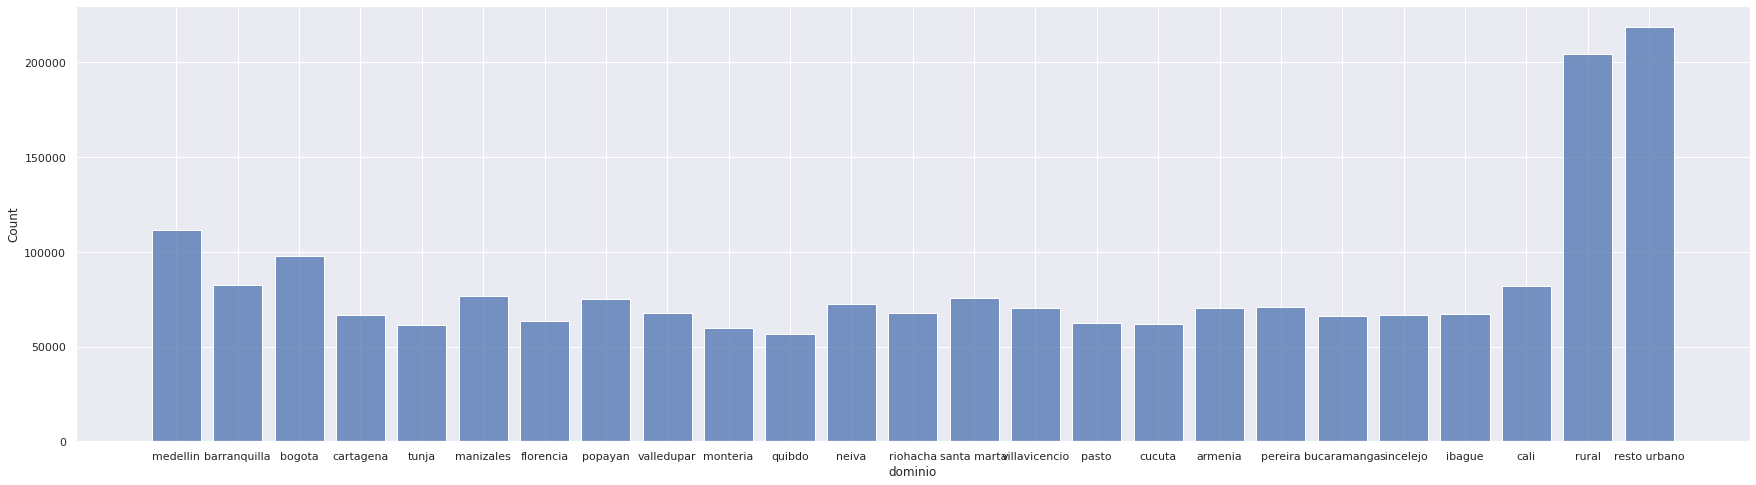

In [94]:
sns.set(rc={'figure.figsize':(30,8)})
sns.histplot(data=Hogares, x="dominio", multiple="stack", shrink=0.8)

**Size of the sample per city and per main variable. Indigence estimator.**

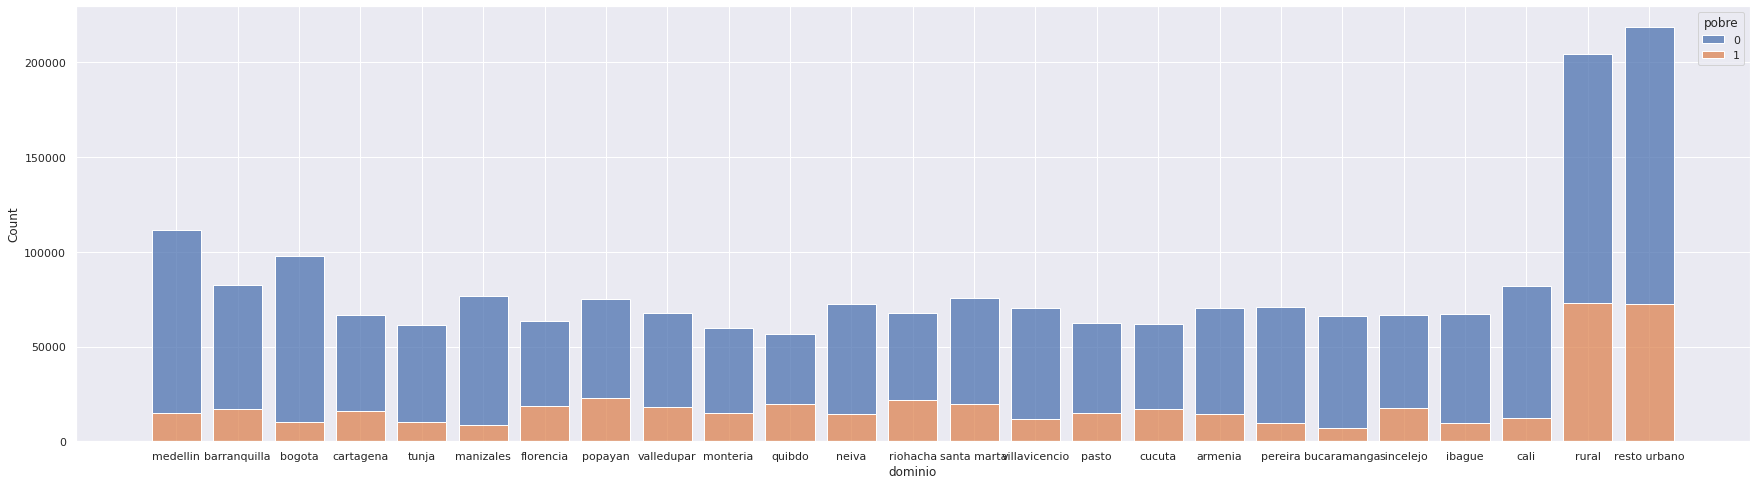

In [95]:
sns.set(rc={'figure.figsize':(30,8)})
sns.histplot(data=Hogares, x="dominio", hue='pobre', multiple="stack", shrink=0.8)

In [96]:
X = Hogares[['fecha','directorio','dominio']].groupby(['fecha','dominio']).count().unstack()
X_1 = Hogares[['fecha','directorio','pobre']].groupby(['fecha','pobre']).count().unstack()

**Trend of poverty and no poverty in the country**

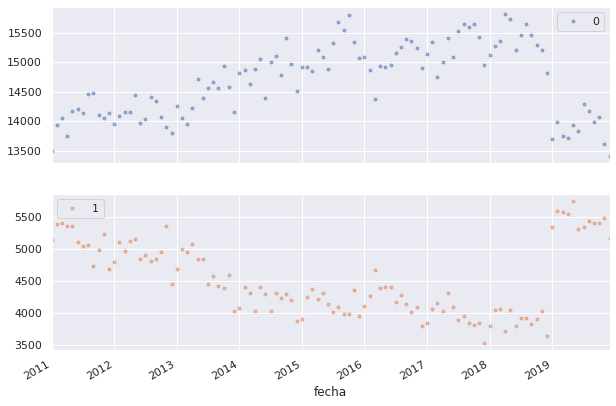

In [97]:
cols_plot = [0,1]
axes = X_1['directorio'][cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(10,7), subplots=True)

### Poverty and Indigence rate

In [130]:
data = pd.read_csv('data/integrated.csv', encoding='utf-8-sig')
data.loc[data['UNI_MED'] == 1,  'FIXED_EDAD'] = data['EDAD']
data.loc[data['UNI_MED'] == 2,  'FIXED_EDAD'] = data['EDAD'] / 12
data = data[(data['UNI_MED'] != 3) & (data['UNI_MED'] != 4) & (data['UNI_MED'] != 5) & (data['UNI_MED'] != 0)]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
data['FIXED_EDAD'] = data['FIXED_EDAD'].apply(lambda x: round(x, 1)) 

In [132]:
list_filter = ['Unnamed: 0', 'FEC_NOT', 'SEMANA', 'ANO', 'COD_PRE', 'COD_SUB', 'EDAD', 'UNI_MED', 'COD_PAIS_O',\
               'COD_DPTO_O', 'COD_MUN_O', 'PER_ETN', 'GP_DISCAPA',	'GP_DESPLAZ',	'GP_MIGRANT',	'GP_CARCELA',	'GP_GESTAN',\
               'GP_INDIGEN',	'GP_POBICFB',	'GP_MAD_COM',	'GP_DESMOVI',	'GP_PSIQUIA',	'GP_VIC_VIO',	'GP_OTROS',\
               'COD_DPTO_R',	'COD_MUN_R',	'FEC_CON',	'INI_SIN', 'TIP_CAS', 'PAC_HOS', 'FEC_HOS', 'CON_FIN', 'FEC_DEF', 'AJUSTE',\
               'FM_FUERZA', 'confirmados', 'est_f_caso', 'nom_est_f_caso', 'Departamento_ocurrencia', 'Municipio_ocurrencia', 'MES', 'Date_month']

data_filter = data.drop(list_filter, axis = 1)

In [133]:
data_filter_2 = data_filter.copy()
data_filter_temp = data_filter_2[['COD_EVE', 'AREA',	'OCUPACION', 'Evento',	'Departamento_residencia',	'Municipio_residencia',	'Date',	'Poverty_rate',	'Indigence_rate',	'tavg',	'prcp']]
cat_features = data_filter_2.select_dtypes(include = ["object", "category"]).columns
cat_features = cat_features[:2]
one_hot = pd.get_dummies(data_filter_2[cat_features])

data_transform = pd.concat([data_filter_temp, one_hot], axis = 1)

data_transform['Date'] = pd.to_datetime(data_transform['Date'])
data_transform['count_cases'] = data_transform.groupby(pd.Grouper(freq="W", key ='Date'))['OCUPACION'].count().reset_index(name= 'count')['count']

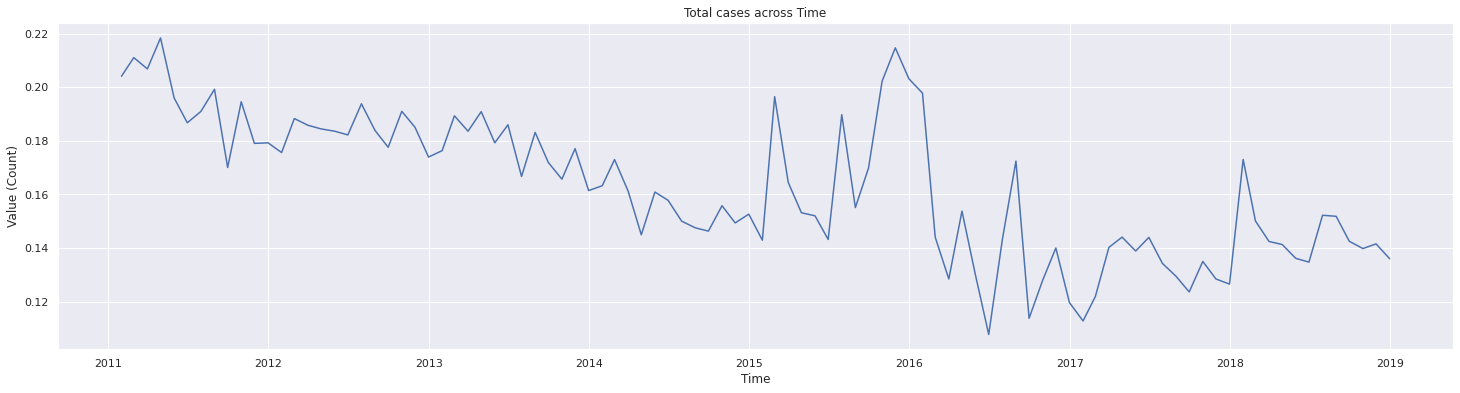

In [134]:
###Plot poverty rate
plot_time_series_temp = data_transform.groupby(pd.Grouper(freq="M", key ='Date'))['Poverty_rate'].mean().reset_index(name= 'count')

fig, ax1 = plt.subplots(figsize=(25,6))

ax = sns.lineplot(x='Date',y='count', data=plot_time_series_temp)
ax.set_title('Total cases across Time')
ax.set_ylabel('Value (Count)')
ax.set_xlabel('Time')
plt.show()

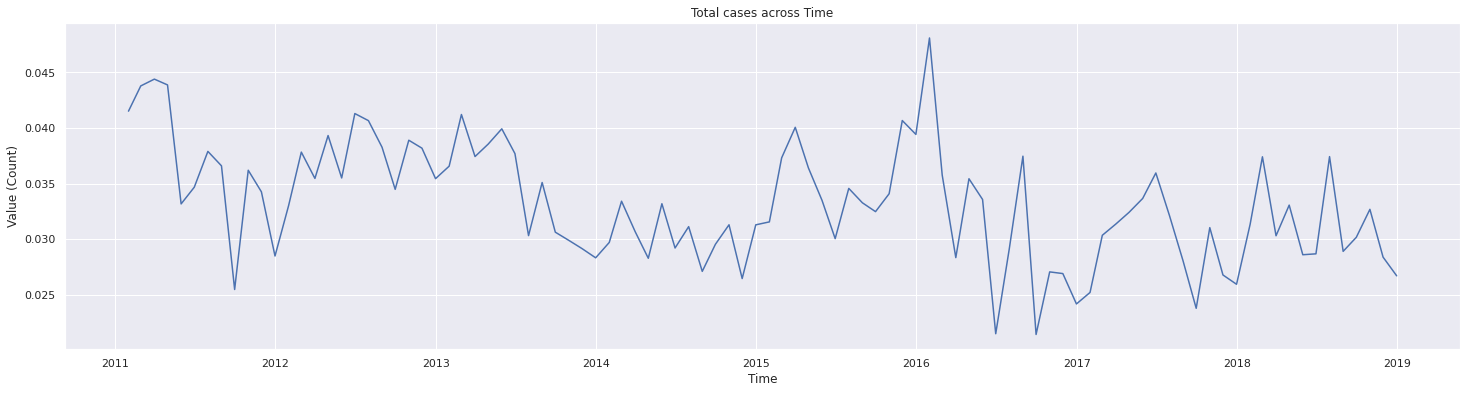

In [135]:
##Plot indigence rate
plot_time_series_temp = data_transform.groupby(pd.Grouper(freq="M", key ='Date'))['Indigence_rate'].mean().reset_index(name= 'count')

fig, ax1 = plt.subplots(figsize=(25,6))

ax = sns.lineplot(x='Date',y='count', data=plot_time_series_temp)
ax.set_title('Total cases across Time')
ax.set_ylabel('Value (Count)')
ax.set_xlabel('Time')
plt.show()

In [136]:
####Load shape fail from Colombia
poverty = data[['Municipio_residencia','Poverty_rate']]
poverty = poverty.groupby(['Municipio_residencia']).mean().sort_values('Poverty_rate',ascending=False).reset_index()
poverty = poverty.rename(columns={'Municipio_residencia':'NOMBRE_MPI'})
merged = regions.set_index('NOMBRE_MPI').join(poverty.set_index('NOMBRE_MPI'))
merged = merged.reset_index()
merged = merged.fillna(0)

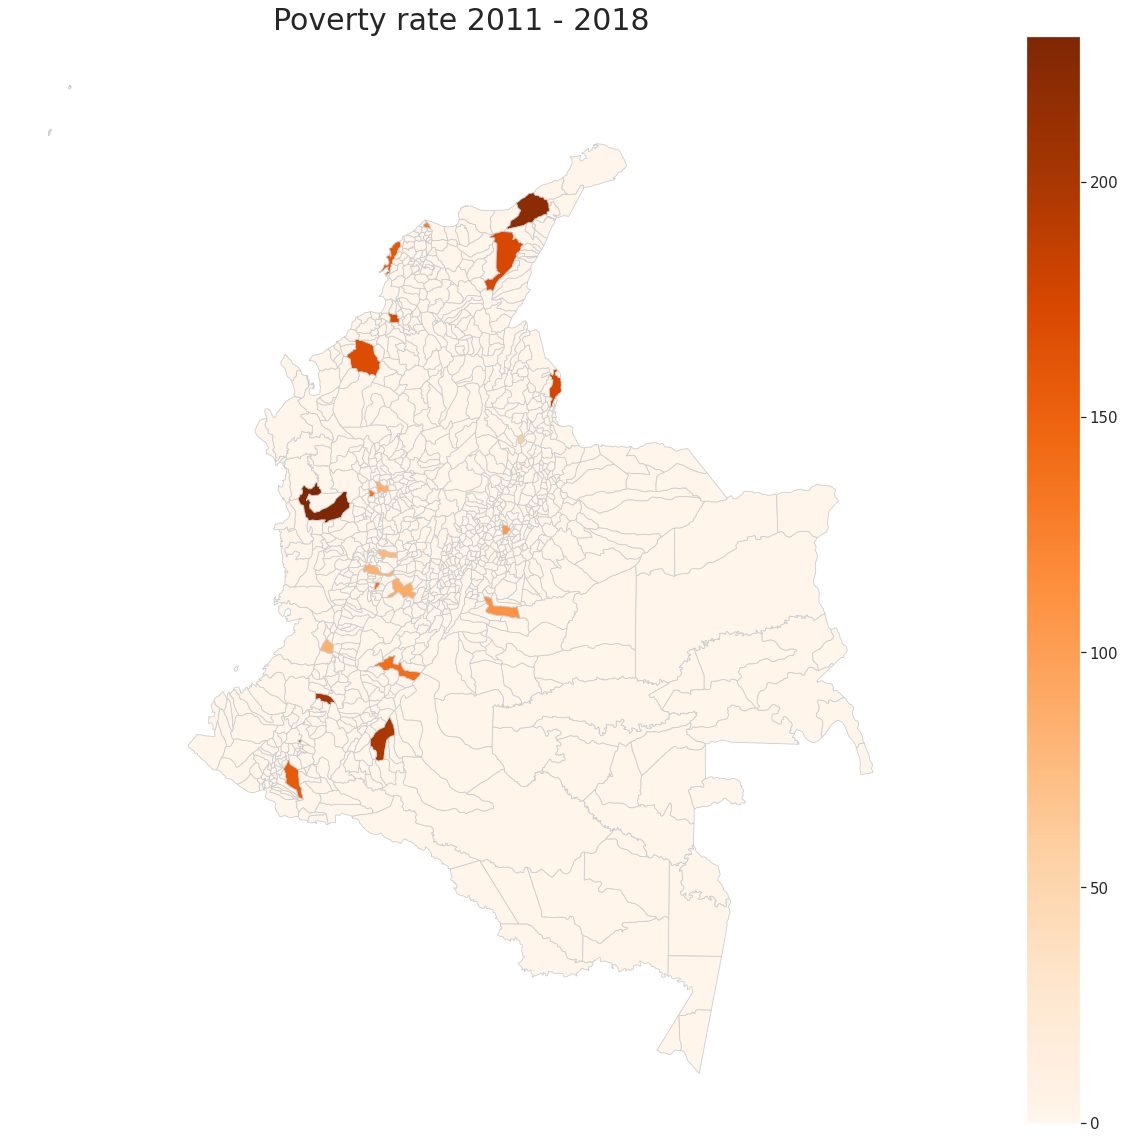

In [137]:
###Plot poverty rate
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Poverty rate 2011 - 2018', fontdict={'fontsize': '30', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=15)
merged.plot('Poverty_rate', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
plt.show()

**Tasa indigencia**

In [138]:
indigence = data[['Municipio_residencia','Indigence_rate']]
indigence = indigence.groupby(['Municipio_residencia']).mean().sort_values('Indigence_rate',ascending=False).reset_index()
indigence = indigence.rename(columns={'Municipio_residencia':'NOMBRE_MPI'})
merged = regions.set_index('NOMBRE_MPI').join(indigence.set_index('NOMBRE_MPI'))
merged = merged.reset_index()
merged = merged.fillna(0)

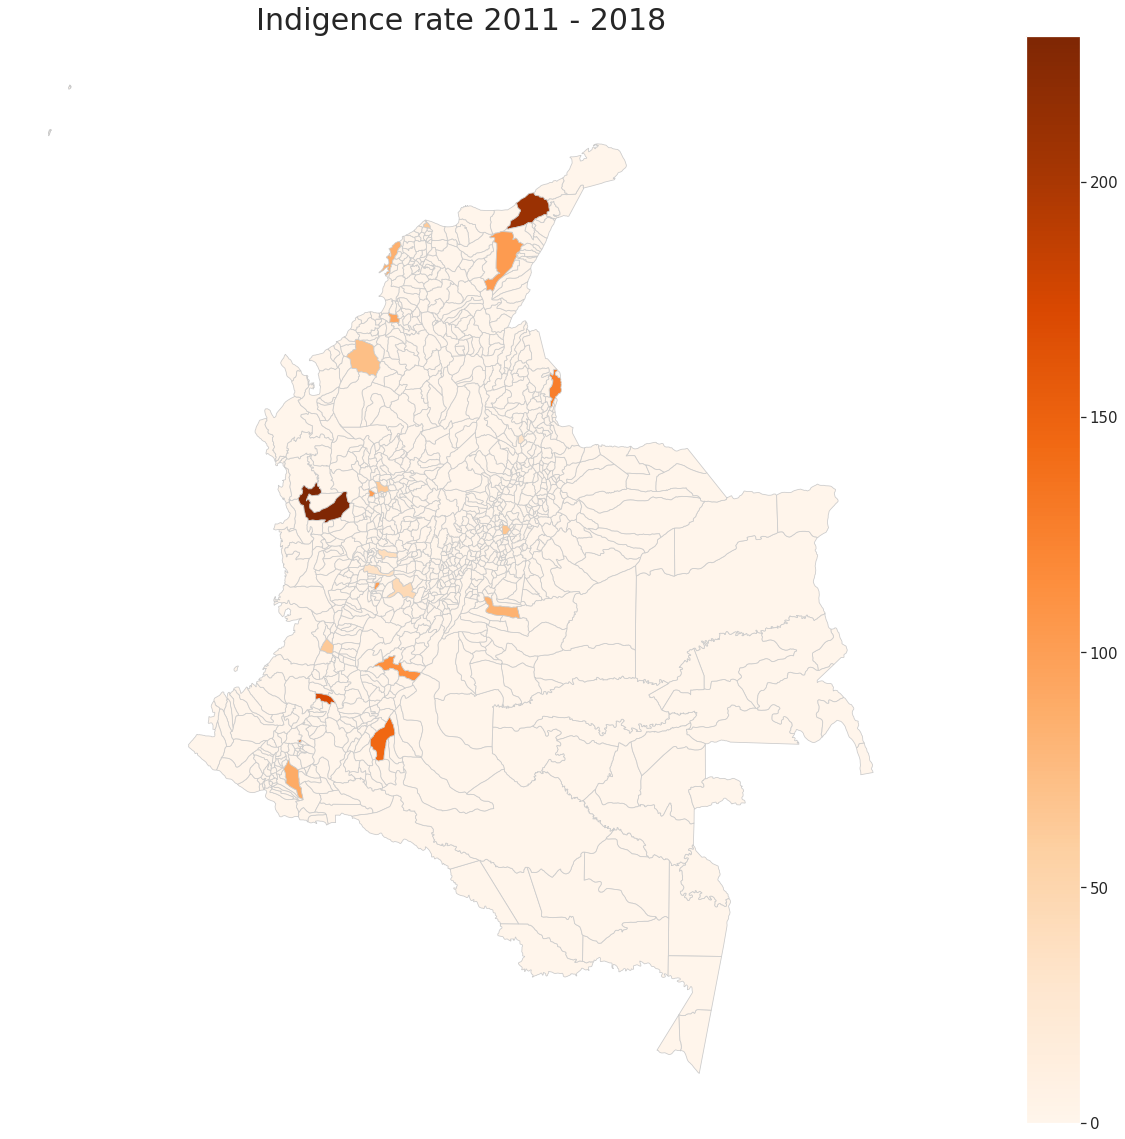

In [139]:
###Plot indigence rate in a map
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Indigence rate 2011 - 2018', fontdict={'fontsize': '30', 'fontweight' : '3'})
color = 'Oranges'
vmin, vmax = 0, 231
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=15)
merged.plot('Indigence_rate', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
plt.show()

# **Climate**

We load the data from climate of Colombia.

In [140]:
df_climate = pd.read_csv('data/climate_grouped.csv',
                      encoding='utf-8-sig')

The first task to do is cleaning department columns, here changing tildes and accents from the departament.

In [141]:
departments_to_replace = {'AMAZONAS': 'AMAZONAS',
                          'ANTIOQUIA': 'ANTIOQUIA',
                          'ARAUCA': 'ARAUCA',
                          'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA': 'SAN ANDRES',
                          'ATLÁNTICO': 'ATLANTICO',
                          'BOGOTÁ, D.C.': 'BOGOTA',
                          'BOLÍVAR': 'BOLIVAR',
                          'BOYACÁ': 'BOYACA',
                          'CALDAS': 'CALDAS',
                          'CAQUETÁ': 'CAQUETA',
                          'CASANARE': 'CASANARE',
                          'CAUCA': 'CAUCA',
                          'CESAR': 'CESAR',
                          'CHOCÓ': 'CHOCO',
                          'CUNDINAMARCA': 'CUNDINAMARCA',
                          'CÓRDOBA': 'CORDOBA',
                          'GUAINÍA': 'GUAINIA',
                          'GUAVIARE': 'GUAVIARE',
                          'HUILA': 'HUILA',
                          'LA GUAJIRA': 'GUAJIRA',
                          'MAGDALENA': 'MAGDALENA',
                          'META': 'META',
                          'NARIÑO': 'NARIÑO',
                          'NORTE DE SANTANDER': 'NORTE SANTANDER',
                          'PUTUMAYO': 'PUTUMAYO',
                          'QUINDÍO': 'QUINDIO',
                          'RISARALDA': 'RISARALDA',
                          'SANTANDER': 'SANTANDER',
                          'SUCRE': 'SUCRE',
                          'TOLIMA': 'TOLIMA',
                          'VALLE DEL CAUCA': 'VALLE',
                          'VAUPÉS': 'VAUPES',
                          'VICHADA': 'VICHADA'
}
df_climate.dpto = df_climate[['dpto']].replace(departments_to_replace).squeeze()

Reading directory from_to of cities for name standardization

In [142]:
cities_correction = pd.read_csv('data/conversion_cities.csv',
                      encoding='utf-8-sig')
df_climate = df_climate.merge(cities_correction, 
                         how='left', 
                         left_on=["dpto", "muni"], 
                         right_on=["dpto","muni"],
                         copy=False
                         )

We create the variable 'Date' with the variables year and weeks from the data, and also create the variable 'Month' from 'Date'.


In [143]:
df_climate['Date'] = pd.to_datetime(df_climate['year'].astype(str) + '-' + df_climate['week'].astype(str) + '-1', format='%Y-%W-%w')
df_climate['month'] = df_climate.Date.dt.month

Then we organize and select relevant columns for the project and finally renaming accorsing to diseases dataframe convention.

In [144]:
df_climate = df_climate[['dpto', 'Municipio_residencia', 'year', 'month', 'week', 'tavg', 'prcp']]
df_climate.columns = ['Departamento_residencia', 'Municipio_residencia', 'ANO', 'MES', 'SEMANA', 'tavg', 'prcp']

Converting year month and week in categorical variables to avoid being aggregated

In [145]:
for col in ['ANO', 'MES', 'SEMANA']:
    df_climate[col] = df_climate[col].astype('category',copy=False)

Finally merging diseases + social economical with climate 

Preparing the data from diseases to be merged with both climate and poverty and indigency

In [148]:
#Creating a column with onlu year and month
data.Date = pd.to_datetime(data.Date)
data['Date_month'] = data.Date.dt.year.astype(str) + data.Date.dt.month.astype(str)
# Leaving only EDAD and confirmados as quantitative data
categorical_features = list(data.describe().columns)
categorical_features.remove('confirmados')
categorical_features.remove('EDAD')
for col in categorical_features:
    data[col] = data[col].astype('category',copy=False)

#correcting some strings for future matching
data.Municipio_residencia = data.Municipio_residencia.str.replace('¥', 'Ñ')
data.Municipio_residencia = data.Municipio_residencia.str.replace('GUACHENÈ', 'GUACHENE')
data.Municipio_residencia = data.Municipio_residencia.str.replace('GUACHENÔ', 'GUACHENE')

Reading poverty and indigence dataframe from excel file and creating a column with onlu year and month

In [149]:
df_Poverty_Idigence = pd.read_excel('data/poverty_rates.xlsx')
df_Poverty_Idigence.DATE = pd.to_datetime(df_Poverty_Idigence.DATE)
df_Poverty_Idigence['Date_month'] = df_Poverty_Idigence.DATE.dt.year.astype(str) + df_Poverty_Idigence.DATE.dt.month.astype(str)

Reshaping Poverty and Indigence dataframe to *get* ready for merging

In [150]:
cols = df_Poverty_Idigence.columns
df_Poverty = pd.melt(df_Poverty_Idigence[df_Poverty_Idigence.SE_TYPE=='Poverty'], id_vars=cols[-1],
                       value_vars=cols[2:-1],
                       var_name='Municipio_residencia',
                      value_name='Poverty_rate'
)

df_Indigence = pd.melt(df_Poverty_Idigence[df_Poverty_Idigence.SE_TYPE=='Indigence'], id_vars=cols[-1],
                       value_vars=cols[2:-1],
                       var_name='Municipio_residencia',
                       value_name='Indigence_rate'
)


Finally merging diseases dataframe with Povery and Indigence dataframes

In [151]:
merged_data = data.merge(df_Poverty, 
                         how='left', 
                         left_on=["Date_month", "Municipio_residencia"], 
                         right_on=["Date_month","Municipio_residencia"],
                         copy=False
                         ).merge(df_Indigence,
                                 how='left', 
                                 left_on=["Date_month", "Municipio_residencia"], 
                                 right_on=["Date_month","Municipio_residencia"]
                                 )

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137087 entries, 0 to 137086
Data columns (total 58 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               137087 non-null  category      
 1   COD_EVE                  137087 non-null  category      
 2   FEC_NOT                  137087 non-null  object        
 3   SEMANA                   137087 non-null  category      
 4   ANO                      137087 non-null  category      
 5   COD_PRE                  137087 non-null  category      
 6   COD_SUB                  137087 non-null  category      
 7   EDAD                     137087 non-null  int64         
 8   UNI_MED                  137087 non-null  category      
 9   SEXO                     137087 non-null  object        
 10  COD_PAIS_O               137087 non-null  category      
 11  COD_DPTO_O               137087 non-null  category      
 12  COD_MUN_O       

Checking number of weeks of available information in climate dataframe

In [152]:
df_climate.pivot_table(index=['Departamento_residencia', 'Municipio_residencia'],
                       columns='ANO',
                       aggfunc='count',
                       values='tavg')

ANO                                           2007  2008  2009  2010  2011  \
Departamento_residencia Municipio_residencia                                 
AMAZONAS                EL ENCANTO            52.0  52.0  53.0  53.0  52.0   
                        LA CHORRERA           52.0  52.0  53.0  53.0  52.0   
                        LA PEDRERA (CD)       51.0  43.0  53.0  53.0  52.0   
                        LA VICTORIA           52.0  52.0  53.0  53.0  52.0   
                        LETICIA               51.0  43.0  53.0  53.0  52.0   
...                                            ...   ...   ...   ...   ...   
VAUPES                  YAVARATE              51.0  43.0  53.0  53.0  52.0   
VICHADA                 CUMARIBO              52.0  51.0  53.0  52.0  51.0   
                        LA PRIMAVERA          17.0   4.0  37.0  53.0  52.0   
                        PUERTO CARREÑO         2.0   NaN  33.0  49.0  52.0   
                        SANTA ROSALIA         17.0   4.0  37.0  53.0  52.0   

ANO                                           2012  2013  2014  2015  2016  \
Departamento_residencia Municipio_residencia                                 
AMAZONAS                EL ENCANTO            52.0  52.0  52.0  51.0  53.0   
                        LA CHORRERA           52.0  52.0  52.0  51.0  53.0   
                        LA PEDRERA (CD)       52.0  52.0  52.0  51.0  53.0   
                        LA VICTORIA           52.0  52.0  52.0  51.0  53.0   
                        LETICIA               52.0  52.0  52.0  51.0  53.0   
...                                            ...   ...   ...   ...   ...   
VAUPES                  YAVARATE              52.0  52.0  52.0  51.0  53.0   
VICHADA                 CUMARIBO              52.0  42.0  52.0  39.0  41.0   
                        LA PRIMAVERA          52.0  52.0  51.0  51.0  53.0   
                        PUERTO CARREÑO        52.0  52.0  52.0  51.0  53.0   
                        SANTA ROSALIA         52.0  52.0  51.0  51.0  53.0   

ANO                                           2017  2018  
Departamento_residencia Municipio_residencia              
AMAZONAS                EL ENCANTO            52.0  52.0  
                        LA CHORRERA           52.0  52.0  
                        LA PEDRERA (CD)       52.0  52.0  
                        LA VICTORIA           52.0  52.0  
                        LETICIA               52.0  52.0  
...                                            ...   ...  
VAUPES                  YAVARATE              52.0  52.0  
VICHADA                 CUMARIBO               5.0   1.0  
                        LA PRIMAVERA          52.0  52.0  
                        PUERTO CARREÑO        52.0  52.0  
                        SANTA ROSALIA         52.0  52.0  

[1121 rows x 12 columns]